In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tabarena.icml2026.plotting.per_dataset_results import plot_model_performance_across_datasets

from tabarena.icml2026.plotting.two_figures_boxplots import boxplot_two_dataframes_pubready, boxplot_models_combined_vs_tabprep
from tabarena.icml2026.plotting.single_preprocessor_boxplots import ablation_boxplot_colored_by_best

from tabarena.nips2025_utils.tabarena_context import TabArenaContext
        # extra_methods: list[MethodMetadata] = None,
        # include_unverified: bool = False,

ta_context = TabArenaContext()
# ta_context.load_configs_hyperparameters(methods = ["PrepLightGBM", "PrepLinearModel"], download=False)
# ta_context.load_results_paper(methods=["PrepLightGBM", "PrepLinearModel"])
ta_results = pd.concat([ta_context.load_hpo_results(i) for i in ta_context.methods if "AutoGluon" not in i]).reset_index(drop=True)

In [2]:
from tabarena.nips2025_utils.tabarena_context import TabArenaContext
ta_context = TabArenaContext()
ta_context.load_config_results("PrepLightGBM")

,dataset,fold,method,metric_error,time_train_s,time_infer_s,metric,problem_type,metric_error_val,method_type,config_type,ta_name,ta_suite
0,APSFailure,0,prep_LightGBM_icml_v3_c1_BAG_L1,0.004496,247.512386,18.029049,roc_auc,binary,0.009845,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
1,APSFailure,0,prep_LightGBM_icml_v3_r100_BAG_L1,0.003436,376.093226,30.533376,roc_auc,binary,0.009020,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
2,APSFailure,0,prep_LightGBM_icml_v3_r101_BAG_L1,0.003896,288.336905,17.532683,roc_auc,binary,0.010465,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
3,APSFailure,0,prep_LightGBM_icml_v3_r102_BAG_L1,0.003686,540.150507,9.435331,roc_auc,binary,0.009415,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
4,APSFailure,0,prep_LightGBM_icml_v3_r103_BAG_L1,0.004376,298.744755,30.468736,roc_auc,binary,0.010177,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164011,wine_quality,8,prep_LightGBM_icml_v3_r96_BAG_L1,0.605454,254.620842,3.054076,rmse,regression,0.611357,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
164012,wine_quality,8,prep_LightGBM_icml_v3_r97_BAG_L1,0.608236,48.659918,2.344885,rmse,regression,0.612013,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
164013,wine_quality,8,prep_LightGBM_icml_v3_r98_BAG_L1,0.610439,113.895876,0.669024,rmse,regression,0.616474,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23
164014,wine_quality,8,prep_LightGBM_icml_v3_r99_BAG_L1,0.623034,255.424222,4.149163,rmse,regression,0.623387,config,PREP_GBM,PrepLightGBM,tabarena-2026-01-23


In [5]:
base_path = "/ceph/atschalz/auto_prep/tabarena_figs/icml_final/"
all_model_results = pd.DataFrame()
all_hpo_results = pd.DataFrame()
models = ["prep_TabM", "prep_RealTabPFN"] #, "prep_RealMLP"]
for model_name in models:
    model_results = pd.read_csv(f"{base_path}/{model_name}/model_results.csv")
    model_results["model_name"] = model_name
    all_model_results = pd.concat([all_model_results, model_results]).reset_index(drop=True)

    hpo_results = pd.read_csv(f"{base_path}/{model_name}/hpo_results.csv")
    hpo_results["model_name"] = model_name
    all_hpo_results = pd.concat([all_hpo_results, hpo_results]).reset_index(drop=True)

all_model_results.ta_name = all_model_results.ta_name.map({"prep_TabM": "PrepTabM", 
                                                 "RealTabPFN-v2.5": "RealTabPFN2.5", 
                                                 "prep_RealTabPFN-v2.5": "PrepRealTabPFN2.5", 
                                                 "TabM_GPU": "TabM"}).fillna(all_model_results.ta_name)

all_model_results.shape

(12558, 14)

In [7]:
cnt_lst = []
for model_name in models:
    for dataset_name in all_model_results['dataset'].unique():
        for fold in range(3):
            # print(f"{model_name}, {dataset_name}: {all_model_results.loc[all_model_results['dataset'] == dataset_name].loc[all_model_results['model_name'] == model_name].shape[0]}")
            cnt = all_model_results.loc[all_model_results['dataset'] == dataset_name].loc[all_model_results['model_name'] == model_name].loc[all_model_results['fold'] == fold].shape[0]
            cnt_lst.append({'model_name': model_name, 'dataset': dataset_name, 'fold': fold, 'count': cnt})
        

df_cnt = pd.DataFrame(cnt_lst)

In [9]:
# df_cnt.loc[df_cnt.fold==2].sort_values(by=['count']).head(50)
df_cnt.loc[df_cnt.fold==0].sort_values(by=['count']).groupby(['model_name', 'dataset']).sum().tail(50).sort_values("count")

fold  count
model_name dataset                                                
prep_TabM  NATICUSdroid                                   0      5
           taiwanese_bankruptcy_prediction                0      5
           superconductivity                              0      5
           credit_card_clients_default                    0      5
           kddcup09_appetency                             0      5
           physiochemical_protein                         0      5
           wine_quality                                   0     19
           GiveMeSomeCredit                               0     28
           Diabetes130US                                  0     36
           SDSS17                                         0     41
           houses                                         0     43
           online_shoppers_intention                      0     46
           customer_satisfaction_in_airline               0     47
           Food_Delivery_Time                             0     48
           miami_housing                                  0     50
           maternal_health_risk                           0     50
           polish_companies_bankruptcy                    0     50
           seismic-bumps                                  0     50
           jm1                                            0     50
           in_vehicle_coupon_recommendation               0     50
           qsar-biodeg                                    0     50
           hiva_agnostic                                  0     50
           heloc                                          0     50
           healthcare_insurance_expenses                  0     50
           hazelnut-spread-contaminant-detection          0     50
           students_dropout_and_academic_success          0     50
           splice                                         0     50
           diamonds                                       0     50
           Amazon_employee_access                         0     50
           website_phishing                               0     50
           Another-Dataset-on-used-Fiat-500               0     50
           Bank_Customer_Churn                            0     50
           Bioresponse                                    0     50
           E-CommereShippingData                          0     50
           Fitness_Club                                   0     50
           HR_Analytics_Job_Change_of_Data_Scientists     0     50
           Is-this-a-good-customer                        0     50
           MIC                                            0     50
           diabetes                                       0     50
           Marketing_Campaign                             0     50
           QSAR_fish_toxicity                             0     50
           airfoil_self_noise                             0     50
           anneal                                         0     50
           bank-marketing                                 0     50
           blood-transfusion-service-center               0     50
           churn                                          0     50
           coil2000_insurance_policies                    0     50
           concrete_compressive_strength                  0     50
           QSAR-TID-11                                    0     50
           credit-g                                       0     50

In [30]:
fold = 0

### Per-dataset plot

In [176]:
comb_results = pd.concat([
    all_hpo_results[["dataset", "fold", "ta_name", "metric_error", "metric_error_val", "method_subtype"]], 
    ta_results[["dataset", "fold", "ta_name", "metric_error", "metric_error_val", "method_subtype"]]
    ]).reset_index(drop=True)

comb_results.ta_name = comb_results.ta_name.map({"prep_TabM": "PrepTabM", 
                                                 "RealTabPFN-v2.5": "RealTabPFN2.5", 
                                                 "prep_RealTabPFN-v2.5": "PrepRealTabPFN2.5", 
                                                 "TabM_GPU": "TabM"}).fillna(comb_results.ta_name)

In [187]:
comb_results_use = comb_results.copy()

In [188]:
comb_results_use = comb_results.copy()
# comb_results_use = comb_results_use.loc[comb_results_use['method_subtype']=="tuned_ensemble"]
comb_results_use = comb_results_use.loc[comb_results_use.fold==fold]

dat_map = {
    "HR_Analytics_Job_Change_of_Data_Scientists": "HR_Analytics",
    "students_dropout_and_academic_success": "students_dropout",
    "blood-transfusion-service-center": 'blood-transfusion',
    "Another-Dataset-on-used-Fiat-500": "Fiat-500", 
    "coil2000_insurance_policies": "coil2000",
    "hazelnut-spread-contaminant-detection": "hazelnut-spread",
    "taiwanese_bankruptcy_prediction": "taiwanese_bankruptcy",
    "polish_companies_bankruptcy": "polish_companies",
    "healthcare_insurance_expenses": "healthcare_insurance",
    "in_vehicle_coupon_recommendation": "in_vehicle",
    "Amazon_employee_access": "Amazon_employee",
    "concrete_compressive_strength": "concrete",
    "customer_satisfaction_in_airline": "customer_satisfaction",
    "E-CommereShippingData": "E-Commerce",
    "online_shoppers_intention": "online_shoppers",
    "Is-this-a-good-customer": "Is-good-customer",
    "Food_Delivery_Time": "Food_Delivery",
    "credit_card_clients_default": "credit_card_clients",
    }
comb_results_use.dataset = comb_results_use.dataset.apply(lambda x: dat_map.get(x, x))

# list(comb_results_use.dataset.unique())

In [189]:
comb_results_use_bar = comb_results_use.copy()

for dataset_name in comb_results_use_bar.dataset.unique():

    for model_name in ["TabM", "LinearModel", "LightGBM", "RealTabPFN2.5"]:
        prep = comb_results_use_bar.loc[np.logical_and(comb_results_use_bar.dataset==dataset_name, comb_results_use_bar.ta_name==f"Prep{model_name}")]
        base = comb_results_use_bar.loc[np.logical_and(comb_results_use_bar.dataset==dataset_name, comb_results_use_bar.ta_name==model_name)]
        if prep.shape[0]==0 or base.shape[0]==0:
            continue
        if base.metric_error_val.values[0] < prep.metric_error_val.values[0]:       
            comb_results_use_bar.loc[np.logical_and(comb_results_use_bar.dataset==dataset_name, comb_results_use_bar.ta_name==f"Prep{model_name}"),"metric_error"] = base.metric_error.values[0]
            # print(f"{model_name}: {base.metric_error_val.values[0]:.4f}, {prep.metric_error_val.values[0]:.4f}")

comb_results_use_bar
    

,dataset,fold,ta_name,metric_error,metric_error_val,method_subtype
0,SDSS17,0,PrepTabM,0.068588,0.069765,default
1,SDSS17,0,PrepTabM,0.066061,0.067912,tuned
2,SDSS17,0,PrepTabM,0.065874,0.067055,tuned_ensemble
3,GiveMeSomeCredit,0,PrepTabM,0.129792,0.137343,default
4,GiveMeSomeCredit,0,PrepTabM,0.129792,0.136045,tuned
...,...,...,...,...,...,...
48798,students_dropout,0,RealTabPFN2.5,0.543731,0.519397,tuned_ensemble
48807,superconductivity,0,RealTabPFN2.5,9.127815,9.157275,tuned_ensemble
48816,taiwanese_bankruptcy,0,RealTabPFN2.5,0.051993,0.057581,tuned_ensemble
48825,website_phishing,0,RealTabPFN2.5,0.203093,0.220271,tuned_ensemble


In [190]:
comb_results_use_bar.loc[comb_results_use_bar.method_subtype=="default","ta_name"] += "_default"
comb_results_use_bar.loc[comb_results_use_bar.method_subtype=="tuned","ta_name"] += "_tuned"


### BEGIN new dataset plots

In [191]:
from typing import Literal, Optional, Sequence, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_model_performance_across_datasets(
    df: pd.DataFrame,
    *,
    dataset_col: str = "dataset",
    metric_col: str = "metric_error",
    model_col: str = "model_name",

    mode: Literal["rank", "median_centered_signed"] = "median_centered_signed",

    normalization_reference_models: Optional[Sequence[str]] = None,
    # ✅ NEW: choose normalization center
    normalization_center: Literal["median", "third_best"] = "median",
    normalization_center_model: Optional[str] = None,
    value_label: str = "Quantile-anchored normalized error (lower is better)",

    display_models: Optional[Sequence[str]] = None,
    sort_datasets_by_model: Optional[str] = None,
    sort_datasets_by_best_of_models: Optional[Sequence[str]] = None,
    sort_direction: Literal["best_to_worst", "worst_to_best"] = "best_to_worst",
    clip_bad_side: bool = True,
    bad_side_cap: float = 1.0,
    clip_good_side: bool = False,
    good_side_cap: float = -1.0,
    dataset_order: Optional[Sequence[str]] = None,
    model_order: Optional[Sequence[str]] = None,
    figsize: Tuple[float, float] = (10, 4.8),
    auto_width_per_dataset: Optional[float] = None,
    font_size: float = 11.0,
    title_font_size: Optional[float] = None,
    label_font_size: Optional[float] = None,
    tick_font_size: Optional[float] = None,
    legend_font_size: Optional[float] = None,
    legend_order: Optional[Sequence[str]] = None,
    title: Optional[str] = None,
    ylabel: Optional[str] = None,
    xlabel: Optional[str] = None,
    y_tick_labels: Optional[Dict[float, str]] = None,
    jitter: float = 0.10,
    marker_size: float = 90.0,
    alpha: float = 0.9,
    invert_rank_axis: bool = True,
    grid: bool = True,
    legend: bool = True,
    legend_ncol: Optional[int] = None,
    connect_models: bool = False,
    line_alpha: float = 0.35,
    show_model_averages: bool = False,
    average_line_style: str = "--",
    average_line_alpha: float = 0.6,
    average_line_width: float = 1.5,
    model_color_groups: Optional[Dict[str, Sequence[str]]] = None,
    model_markers: Optional[Dict[str, str]] = None,
    default_markers: Sequence[str] = ("o", "s", "^", "D", "v", "P", "X"),
    exclude_marker_groups: Optional[Sequence[str]] = None,
    save_path: Optional[str] = None,
    dpi: int = 300,
) -> Tuple[plt.Figure, plt.Axes]:

    # ---------------- Aggregate ----------------
    agg = (
        df.groupby([dataset_col, model_col], as_index=False)[metric_col]
        .mean()
        .rename(columns={metric_col: "metric_mean"})
    )

    # ---------------- Normalization ----------------
    if mode == "rank":
        agg["value"] = agg.groupby(dataset_col)["metric_mean"].rank(
            ascending=True, method="average"
        )
        # value_label = "Rank (1 = best)"
    else:
        ref = (
            agg[agg[model_col].isin(normalization_reference_models)]
            if normalization_reference_models is not None
            else agg
        )

        # best, q25 ("better than 75%"), q50 ("better than 50%" = median)
        best_df = ref.groupby(dataset_col)["metric_mean"].min().reset_index(name="best")

        q_df = (
            ref.groupby(dataset_col)["metric_mean"]
            .quantile([0.25, 0.50])
            .unstack()
            .rename(columns={0.25: "q25", 0.50: "q50"})
            .reset_index()
        )

        stats = best_df.merge(q_df, on=dataset_col, how="left")
        agg = agg.merge(stats, on=dataset_col, how="left")

        x = agg["metric_mean"]
        b = agg["best"]
        q25 = agg["q25"]
        q50 = agg["q50"]

        den_a = (q25 - b).replace(0, np.nan)     # best -> q25
        den_b = (q50 - q25).replace(0, np.nan)   # q25 -> median

        value = np.where(
            x <= q25,
            (x - q25) / den_a,   # b -> -1, q25 -> 0
            (x - q25) / den_b,   # q25 -> 0, q50 -> +1
        )

        # optional: clip anything worse than median to 1
        if clip_bad_side:
            value = np.minimum(value, bad_side_cap)
        if clip_good_side:
            value = np.maximum(value, good_side_cap)

        agg["value"] = value
        # value_label = self.value_label

    # ---------------- Dataset ordering ----------------
    all_ds = agg[dataset_col].unique()
    if dataset_order is None:
        if sort_datasets_by_best_of_models is not None:
            scores = (
                agg[agg[model_col].isin(sort_datasets_by_best_of_models)]
                .groupby(dataset_col)["value"]
                .min()
                .reindex(all_ds)
            )
            dataset_order = scores.sort_values(
                ascending=(sort_direction == "best_to_worst")
            ).index.tolist()
        elif sort_datasets_by_model is not None:
            scores = (
                agg[agg[model_col] == sort_datasets_by_model]
                .set_index(dataset_col)["value"]
                .reindex(all_ds)
            )
            dataset_order = scores.sort_values(
                ascending=(sort_direction == "best_to_worst")
            ).index.tolist()
        else:
            dataset_order = sorted(all_ds)

    # ---------------- Model ordering ----------------
    if model_order is None:
        base = agg if display_models is None else agg[agg[model_col].isin(display_models)]
        model_order = (
            base.groupby(model_col)["value"].mean().sort_values().index.tolist()
        )

    plot_df = agg if display_models is None else agg[agg[model_col].isin(display_models)]

    # ---------------- Font size ----------------
    title_fs = title_font_size or font_size
    label_fs = label_font_size or font_size
    tick_fs = tick_font_size or font_size
    legend_fs = legend_font_size or font_size

    # ---------------- Color & marker mapping ----------------
    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    model_to_color, model_to_marker = {}, {}

    if model_color_groups:
        for c, (_, models) in zip(color_cycle, model_color_groups.items()):
            for m in models:
                model_to_color[m] = c

    remaining = [m for m in model_order if m not in model_to_color]
    for i, m in enumerate(remaining):
        model_to_color[m] = color_cycle[i % len(color_cycle)]

    marker_iter = iter(default_markers)
    for m in model_order:
        model_to_marker[m] = (
            model_markers[m] if model_markers and m in model_markers else next(marker_iter)
        )

    # ---------------- Optional: hide marker groups ----------------
    if exclude_marker_groups and model_markers:
        excluded_models = {
            m
            for group_name in exclude_marker_groups
            for m, marker in model_markers.items()
            if marker == group_name
        }

        plot_df = plot_df[~plot_df[model_col].isin(excluded_models)]

        model_order = [m for m in model_order if m not in excluded_models]

    # ---------------- Plot prep ----------------
    ds_to_x = {d: i for i, d in enumerate(dataset_order)}
    plot_df = plot_df.copy()
    plot_df["x"] = plot_df[dataset_col].map(ds_to_x)
    rng = np.random.default_rng(0)
    plot_df["xj"] = plot_df["x"] + plot_df[model_col].map(
        {m: rng.uniform(-jitter, jitter) for m in model_order}
    )

    if auto_width_per_dataset is not None:
        fig_width = max(figsize[0], plot_df[dataset_col].nunique() * auto_width_per_dataset)
        fig, ax = plt.subplots(figsize=(fig_width, figsize[1]))
    else:
        fig, ax = plt.subplots(figsize=figsize)

    # ---------------- Plot ----------------
    for m in model_order:
        sub = plot_df[plot_df[model_col] == m]
        if sub.empty:
            continue

        ax.scatter(
            sub["xj"],
            sub["value"],
            s=marker_size,
            alpha=alpha,
            color=model_to_color[m],
            marker=model_to_marker[m],
            label=m,
        )

        if connect_models and len(sub) >= 2:
            ax.plot(sub["x"], sub["value"], color=model_to_color[m], alpha=line_alpha)

        if show_model_averages:
            ax.hlines(
                sub["value"].mean(),
                -0.5,
                len(dataset_order) - 0.5,
                linestyles=average_line_style,
                linewidth=average_line_width,
                alpha=average_line_alpha,
                colors=model_to_color[m],
            )

    ax.set_xticks(range(len(dataset_order)))
    ax.set_xticklabels(dataset_order, rotation=30, ha="right", fontsize=tick_fs)
    ax.set_xlim(-0.6, len(dataset_order) - 0.4)

    ax.set_ylabel(ylabel or value_label, fontsize=label_fs)
    ax.set_xlabel(xlabel or "Dataset", fontsize=label_fs)

    ax.tick_params(axis="y", labelsize=tick_fs)

    if title:
        ax.set_title(title, fontsize=title_fs)

    if mode == "rank" and invert_rank_axis:
        ax.invert_yaxis()

    ax.grid(grid, axis="y", alpha=0.3)
    plt.gca().invert_yaxis()

    # 🔹 LEGEND AT TOP
    if legend:
        handles, labels = ax.get_legend_handles_labels()

        if legend_order is not None:
            label_to_handle = dict(zip(labels, handles))
            ordered_handles = [
                label_to_handle[l] for l in legend_order if l in label_to_handle
            ]
            ordered_labels = [
                l for l in legend_order if l in label_to_handle
            ]
        else:
            ordered_handles = handles
            ordered_labels = labels

        ncol = legend_ncol or min(len(ordered_labels), 10)
        ax.legend(
            ordered_handles,
            ordered_labels,
            loc="upper center",
            bbox_to_anchor=(0.5, 1.1),
            ncol=ncol,
            frameon=False,
            fontsize=legend_font_size,
        )

    # ---------------- Custom y-tick labels ----------------
    if y_tick_labels is not None:
        ticks = list(y_tick_labels.keys())
        labels = list(y_tick_labels.values())

        ax.set_yticks(ticks)
        ax.set_yticklabels(labels, fontsize=tick_fs)

    fig.tight_layout(rect=(0, 0, 1, 0.92))

    # 🔹 SAVE FIGURE
    if save_path is not None:
        fig.savefig(save_path, dpi=dpi, bbox_inches="tight")

    return fig, ax

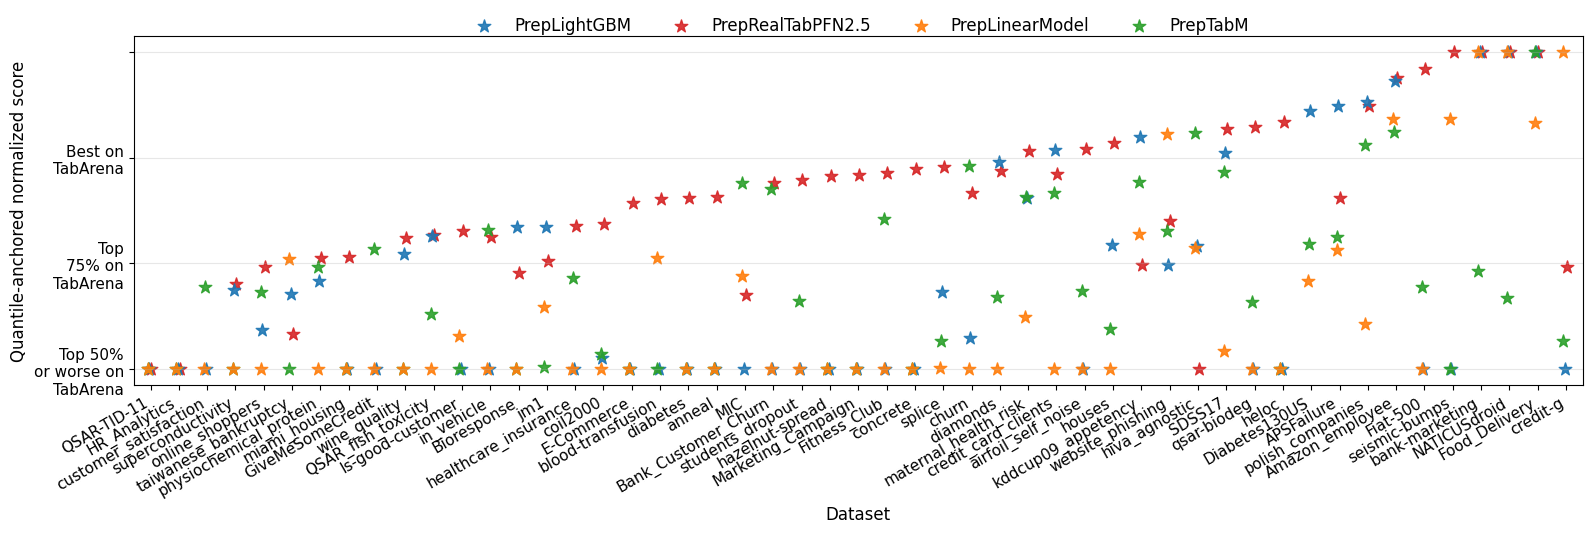

In [170]:
base_marker = "."
prep_marker = "*"

fig, ax = plot_model_performance_across_datasets(
    comb_results_use_bar,
    model_col="ta_name",
    mode="median_centered_signed",
    value_label="Quantile-anchored normalized score",
    # normalization_center="third_best",
    # normalization_center_model="RandomForest",
    normalization_reference_models=[i for i in comb_results_use.ta_name.unique() if "prep" not in i and "Prep" not in i],  # define reference
    display_models=["LightGBM", "PrepLightGBM", "RealTabPFN2.5", "PrepRealTabPFN2.5", "LinearModel", "PrepLinearModel", "TabM", "PrepTabM"],
    legend_order=["LightGBM", "PrepLightGBM", "RealTabPFN2.5", "PrepRealTabPFN2.5", "LinearModel", "PrepLinearModel", "TabM", "PrepTabM"],
    title=None,
    sort_direction="worst_to_best",
    # sort_datasets_by_model="prep_LightGBM",
    sort_datasets_by_best_of_models=["PrepLightGBM", "PrepRealTabPFN2.5", "PrepLinearModel", "PrepTabM"],
    clip_good_side=True,
    bad_side_cap=1,
    good_side_cap=-2,
    show_model_averages=False,
    figsize=(16, 6),
    exclude_marker_groups=[base_marker],
    y_tick_labels={
        -2.0: "",
        -1.0: "Best on\nTabArena",
        0.0: "Top\n75% on\nTabArena",
        1.0: "Top 50%\nor worse on\nTabArena",
    },
    model_color_groups={
    "LightGBM": ["LightGBM", "PrepLightGBM"],
    "LinearModel": ["LinearModel", "PrepLinearModel"],
    "TabM": ["TabM", "PrepTabM"],
    "RealTabPFN": ["RealTabPFN2.5", "PrepRealTabPFN2.5"],
    },
    model_markers={
    "LightGBM": base_marker,
    "PrepLightGBM": prep_marker,
    "LinearModel": base_marker,
    "PrepLinearModel": prep_marker,
    "TabM": base_marker,
    "PrepTabM": prep_marker,
    "RealTabPFN2.5": base_marker,
    "PrepRealTabPFN2.5": prep_marker,
    },
    font_size=12,
    title_font_size=13,
    legend_font_size=12,
    tick_font_size=11,    
    save_path="/ceph/atschalz/auto_prep/tabarena/tabarena/tabarena/icml2026/figures/final_model_performance_across_datasets.pdf",

    # dataset_order="relative",
)


In [192]:
# comb_results_use_bar.loc[comb_results_use_bar.dataset=="HR_Analytics"].sort_values(by="metric_error").head(50)

In [78]:
[i for i in comb_results_use.ta_name.unique() if "prep" not in i and "Prep" not in i],

(['CatBoost',
  'ExtraTrees',
  'LightGBM',
  'NeuralNetFastAI',
  'NeuralNetTorch',
  'RandomForest',
  'XGBoost',
  'ModernNCA_GPU',
  'TabM',
  'TabPFNv2_GPU',
  'ExplainableBM',
  'RealMLP_GPU',
  'xRFM_GPU',
  'LinearModel',
  'KNeighbors',
  'TabDPT_GPU',
  'RealTabPFN2.5'],)

In [18]:
comb_results_use.loc[comb_results_use.groupby("dataset")["metric_error"].idxmin().values, "ta_name"].value_counts()

ta_name
RealTabPFN2.5        11
TabDPT_GPU           10
PrepRealTabPFN2.5     8
PrepLightGBM          6
TabM                  3
ExplainableBM         2
TabPFNv2_GPU          2
KNeighbors            2
NeuralNetFastAI       2
XGBoost               1
RandomForest          1
RealMLP_GPU           1
NeuralNetTorch        1
PrepLinearModel       1
Name: count, dtype: int64

### END - new dataset plots

### Comparison to openFE & autoFeat

In [286]:
base_path = "/ceph/atschalz/auto_prep/tabarena_figs/icml_ablation"
ablation_model_results = pd.read_csv(f"{base_path}/model_results.csv")
ablation_hpo_results = pd.read_csv(f"{base_path}/hpo_results.csv")

fold = 0

ablation_model_results = ablation_model_results.loc[ablation_model_results.fold==fold]

In [287]:
autofeat_comp_df = ablation_model_results.loc[ablation_model_results.method=="AutoFeatLinearModel_c1_BAG_L1",["dataset", "metric_error"]]
autofeat_comp_df.rename(columns={"metric_error": "AutoFeat"}, inplace=True)
base_lr_df = ablation_model_results.loc[ablation_model_results.method=="LinearModel_c1_BAG_L1",["dataset", "metric_error"]]
base_lr_df.rename(columns={"metric_error": "LinearModel"}, inplace=True)

autofeat_comp_df = autofeat_comp_df.merge(base_lr_df, on="dataset", suffixes=("_autofeat", "_baseLR"), how="outer")
autofeat_comp_df.rename(columns={"metric_error_baseLR": "LinearModel"}, inplace=True)

only_order2 = ablation_model_results.loc[ablation_model_results.method=="AutoFeatLinearModel_c2_BAG_L1",["dataset", "metric_error"]]
# autofeat_comp_df.merge(base_lr_df, on="dataset", suffixes=("_autofeat", "_baseLR"))
only_order2 = only_order2.rename(columns={"metric_error": "AutoFeat (2-order)"})

autofeat_comp_df = autofeat_comp_df.merge(only_order2, on="dataset", how="outer")


prep_lr = ta_results.loc[np.logical_and(
    ta_results.method=="PREP_LR (default)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "PrepLinearModel"})

autofeat_comp_df = autofeat_comp_df.merge(prep_lr, on="dataset", suffixes=("", "_prep_lr"), how="outer")

In [370]:
openfe_comp_df = ablation_model_results.loc[ablation_model_results.method=="OpenFELGBModel_c1_BAG_L1",["dataset", "metric_error"]]
openfe_comp_df.rename(columns={"metric_error": "OpenFE"}, inplace=True)
base_lgb_df = ta_results.loc[np.logical_and(
    ta_results.method=="GBM (default)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "LightGBM"})
tuned_ensemble_lgb_df = ta_results.loc[np.logical_and(
    ta_results.method=="GBM (tuned + ensemble)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "LightGBM"})



openfe_comp_df = openfe_comp_df.merge(base_lgb_df, on="dataset", suffixes=("_openfe", "_baseLGB"), how="outer")
openfe_comp_df


prep_lgb_df = ta_results.loc[np.logical_and(
    ta_results.method=="PREP_GBM (default)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "PrepLightGBM"})


prep_lgb_tuned_df = ta_results.loc[np.logical_and(
    ta_results.method=="PREP_GBM (tuned)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "PrepLightGBM"})
prep_lgb_tuned_ensemble_df = ta_results.loc[np.logical_and(
    ta_results.method=="PREP_GBM (tuned + ensemble)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "PrepLightGBM"})

openfe_comp_df = openfe_comp_df.merge(prep_lgb_df, on="dataset", how="outer")


# only_order2 = ablation_model_results.loc[ablation_model_results.method=="AutoFeatLinearModel_c2_BAG_L1",["dataset", "metric_error"]]
# # autofeat_comp_df.merge(base_lr_df, on="dataset", suffixes=("_autofeat", "_baseLR"))
# only_order2 = only_order2.rename(columns={"metric_error": "metric_error_autofeat_only_order2"})

# autofeat_comp_df = autofeat_comp_df.merge(only_order2, on="dataset")


# prep_lr = all_hpo_results.loc[np.logical_and(
#     all_hpo_results.method=="prep_LR (default)",
#     all_hpo_results.fold==fold),["dataset", "metric_error"]]

# autofeat_comp_df = autofeat_comp_df.merge(prep_lr, on="dataset", suffixes=("", "_prep_lr"))
# autofeat_comp_df

In [289]:
# openfe_comp_df["OpenFE_imputed"] = openfe_comp_df["OpenFE"].fillna(openfe_comp_df["LightGBM"])
# openfe_comp_df["PrepLightGBM_openfe_subset"] = openfe_comp_df["LightGBM"].where(~openfe_comp_df["OpenFE"].isna())

# autofeat_comp_df["AutoFeat_imputed"] = autofeat_comp_df["AutoFeat"].fillna(autofeat_comp_df["LinearModel"])
# autofeat_comp_df["PrepLinearModel_autofeat_subset"] = autofeat_comp_df["PrepLinearModel"].where(~autofeat_comp_df["AutoFeat"].isna())

In [290]:
# openfe_comp_df["OpenFE_imputed"] = openfe_comp_df["OpenFE"].fillna(openfe_comp_df["LightGBM"])
# openfe_comp_df["PrepLightGBM_openfe_subset"] = openfe_comp_df["LightGBM"].where(~openfe_comp_df["OpenFE"].isna())


/tmp/ipykernel_1064549/4024877155.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipykernel_1064549/4024877155.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


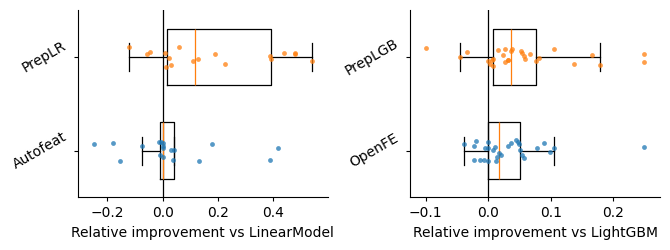

In [291]:
# --- Your exact call (publication-ready, flipped, independent scales, with saving) ---
_ = boxplot_two_dataframes_pubready(
    df_left=autofeat_comp_df,
    left_baseline_col="LinearModel",
    left_competitor_cols=["AutoFeat", "PrepLinearModel"],
    df_right=openfe_comp_df,
    right_baseline_col="LightGBM",
    right_competitor_cols=["OpenFE", "PrepLightGBM"],
    left_labels=["Autofeat", "PrepLR"],
    right_labels=["OpenFE", "PrepLGB"],
    mode="relative",
    cap_left=[-0.25,1],
    cap_right=[-0.1,0.25],
    # titles=("Linear Models", "LightGBM"),
    horizontal=True,
    share_scale=False,
    save_path="/ceph/atschalz/auto_prep/tabarena/tabarena/tabarena/icml2026/figures/autoFE_boxplots_subset.pdf",
    dpi=300,
    transparent=True,
    font_size=10.0,
)


/tmp/ipykernel_1064549/4024877155.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipykernel_1064549/4024877155.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


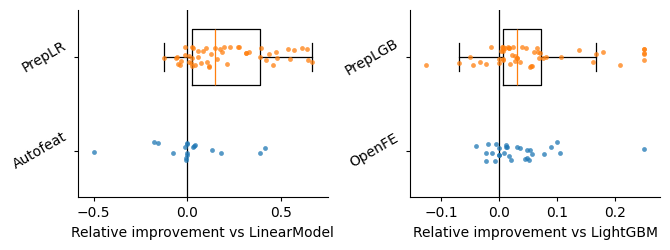

In [ ]:
# --- Your exact call (publication-ready, flipped, independent scales, with saving) ---
_ = boxplot_two_dataframes_pubready(
    dropna=False,
    df_left=autofeat_comp_df,
    left_baseline_col="LinearModel",
    left_competitor_cols=["AutoFeat", "PrepLinearModel"],
    df_right=openfe_comp_df,
    right_baseline_col="LightGBM",
    right_competitor_cols=["OpenFE", "PrepLightGBM"],
    left_labels=["Autofeat", "PrepLR"],
    right_labels=["OpenFE", "PrepLGB"],
    mode="relative",
    cap_left=[-0.5,1],
    cap_right=[-0.5,0.25],
    # titles=("Linear Models", "LightGBM"),
    horizontal=True,
    share_scale=False,
    save_path="/ceph/atschalz/auto_prep/tabarena/tabarena/tabarena/icml2026/figures/autoFE_boxplots_full.pdf",
    dpi=300,
    transparent=True,
    font_size=10.0,
)


In [293]:
autofeat_comp_df.isna().sum(),openfe_comp_df.isna().sum()

(dataset                0
 AutoFeat              33
 LinearModel            0
 AutoFeat (2-order)    26
 PrepLinearModel        0
 dtype: int64,
 dataset          0
 OpenFE          22
 LightGBM         0
 PrepLightGBM     0
 dtype: int64)

### Contribution of single preprocessors

In [299]:
setting_map = {
    "prep_LightGBM-ablation_c1_BAG_L1": "+Arithmetic",
    "prep_LightGBM-ablation_c2_BAG_L1": "RSFC",
    "prep_LightGBM-ablation_c3_BAG_L1": "CombineThenTE",
    "prep_LightGBM-ablation_c4_BAG_L1": "OOF-TE",
    "prep_LightGBM-ablation_c5_BAG_L1": "GroupBy",
    "prep_LightGBM-ablation_c6_BAG_L1": "AbsoluteGroupBy",
    "prep_LightGBM-ablation_c7_BAG_L1": "OOF-TE-keepcat",
    "prep_LightGBM-ablation_c8_BAG_L1": "OOF-TE_w_GroupBy",
    "prep_LightGBM-ablation_c9_BAG_L1": "Arithmetic (2-order)",
    "prep_LightGBM-ablation_c10_BAG_L1": "Arithmetic (prod,ratio)",
    "prep_LightGBM-ablation_c11_BAG_L1": "Arithmetic (sum,diff)",
    "prep_LightGBM-ablation_c12_BAG_L1": "Cat-Pipeline",
    "prep_LightGBM-ablation_c13_BAG_L1": "Cat-Pipeline (keepcat)",
    "prep_LightGBM-ablation_c14_BAG_L1": "+OOF-TE",
    "prep_LightGBM-ablation_c15_BAG_L1": "+CombineThenTE",
    "prep_LightGBM-ablation_c16_BAG_L1": "+GroupBy",

               }

In [300]:
prep_lgb_df["method"] = "+RSFC"
prep_lgb_df.rename(columns={"+RSFC": "metric_error"}, inplace=True)
prep_lgb_df = prep_lgb_df[["dataset", "method", "metric_error"]]

In [301]:
prep_ablation_df = ablation_model_results.loc[ablation_model_results.method.apply(lambda x: x.startswith("prep_LightGBM-ablation")),["dataset", "method", "metric_error"]]
prep_ablation_df["method"] = prep_ablation_df["method"].map(setting_map)
prep_ablation_df = pd.concat([prep_ablation_df,prep_lgb_df], axis=0).reset_index(drop=True)
prep_ablation_df

,dataset,method,metric_error
0,blood-transfusion-service-center,"Arithmetic (prod,ratio)",0.312544
1,blood-transfusion-service-center,"Arithmetic (sum,diff)",0.338070
2,blood-transfusion-service-center,Cat-Pipeline,0.313772
3,blood-transfusion-service-center,Cat-Pipeline (keepcat),0.313772
4,blood-transfusion-service-center,+OOF-TE,0.314737
...,...,...,...
828,students_dropout_and_academic_success,+RSFC,0.564454
829,superconductivity,+RSFC,9.270933
830,taiwanese_bankruptcy_prediction,+RSFC,0.046675
831,website_phishing,+RSFC,0.218581


/tmp/ipykernel_1064549/4024877155.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


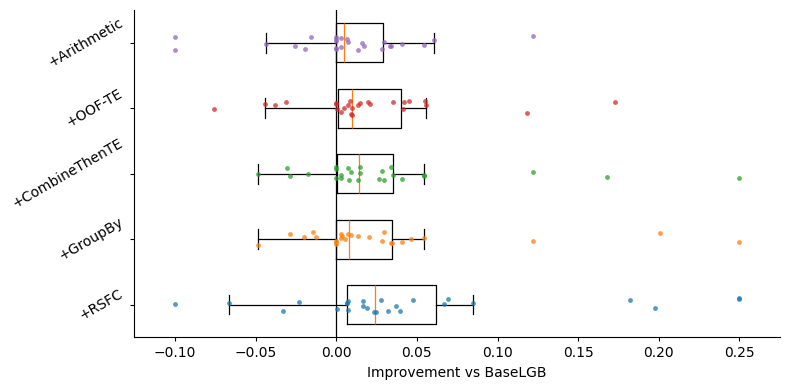

(<Figure size 800x400 with 1 Axes>,
 <Axes: xlabel='Improvement vs BaseLGB'>,
        +RSFC      +GroupBy  +CombineThenTE       +OOF-TE   +Arithmetic
 0   0.006903 -1.460575e-02   -3.067451e-02 -3.087215e-02 -2.549316e-02
 1   0.018998  2.952755e-02    2.952755e-02  4.147129e-02  2.952755e-02
 2  -0.032808 -1.985817e-02   -2.882044e-02 -3.801103e-02 -4.331887e-02
 3   0.023202  2.054512e-02    2.630200e-02  4.625440e-03 -1.576506e-02
 4   0.027861  3.533573e-03   -1.766538e-02  9.513222e-03 -1.966975e-02
 5   0.250000  2.442491e-15    2.442491e-15  2.442491e-15  2.442491e-15
 6  -0.066829 -0.000000e+00   -0.000000e+00  4.893875e-04 -0.000000e+00
 7   0.016858  1.345068e-02    1.345068e-02  1.341901e-02  1.345068e-02
 8  -0.100000  4.659451e-02    5.415791e-02  5.550760e-02  6.092492e-02
 9   0.250000  2.500000e-01    2.500000e-01  1.725667e-01 -1.000000e-01
 10  0.047464  5.410337e-03    7.942489e-03  9.308767e-03  6.574340e-03
 11  0.024595 -2.889854e-02    1.460002e-02  7.503474e-03 

In [462]:
boxplot_dataframe_pubready(
    df_components, 
    baseline_col="BaseLGB", 
    competitor_cols=["+Arithmetic", "+OOF-TE", "+CombineThenTE", "+GroupBy", "+RSFC"][::-1],
    dpi=300,
    transparent=True,
    font_size=10.0,          
    cap=[-0.1,.25],
    figsize = (8, 4),

                           )

In [443]:
df_components = pd.DataFrame(prep_ablation_df.pivot(
        index="dataset",
        columns="method",
        values="metric_error"
    ))
df_components["BaseLGB"] = base_lgb_df["LightGBM"].values
df_components["TunedEnsembleLGB"] = tuned_ensemble_lgb_df["LightGBM"].values
df_components["dataset"] = df_components.index
df_components["TunedPrepLightGBM"] = prep_lgb_tuned_ensemble_df["PrepLightGBM"].values

worst_on_ta = comb_results_use.loc[comb_results_use.ta_name.apply(lambda x: "Prep" not in x).values].groupby(["dataset"]).apply(lambda x: x["metric_error"].loc[x["metric_error_val"].idxmax()])
best_on_ta = comb_results_use.loc[comb_results_use.ta_name.apply(lambda x: "Prep" not in x).values].groupby(["dataset"]).apply(lambda x: x["metric_error"].loc[x["metric_error_val"].idxmin()])
df_components = df_components.merge(best_on_ta.rename("BestOnTabArena"), left_index=True, right_on="dataset")
df_components = df_components.merge(worst_on_ta.rename("WorstOnTabArena"), left_index=True, right_on="dataset")



/tmp/ipykernel_1064549/4272117539.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  worst_on_ta = comb_results_use.loc[comb_results_use.ta_name.apply(lambda x: "Prep" not in x).values].groupby(["dataset"]).apply(lambda x: x["metric_error"].loc[x["metric_error_val"].idxmax()])
/tmp/ipykernel_1064549/4272117539.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_on_ta = comb_results_use.loc[comb_results_use.ta

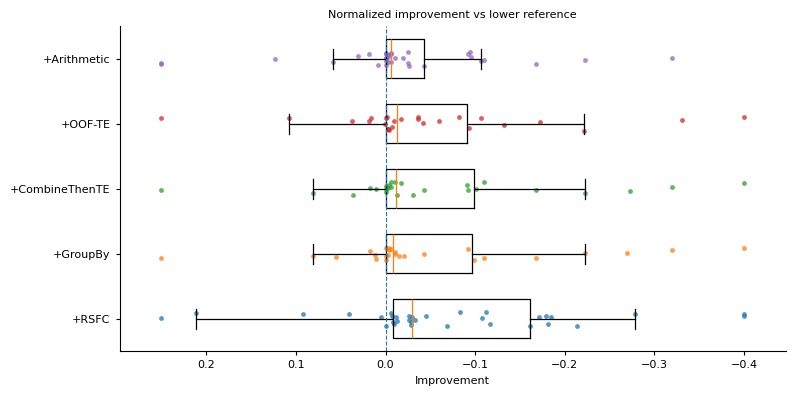

In [460]:
fig, ax, df_norm, plot_df, scores_wide = compare_methods_via_boxplots(
    df=df_components,
    dataset_col="dataset",
    lower_bound_col="BestOnTabArena",
    upper_bound_col="WorstOnTabArena",
    reference_col="BaseLGB",
    # method_cols=["+Arithmetic", "+OOF-TE", "+CombineThenTE", "+GroupBy", "+RSFC", "TunedPrepLightGBM"][::-1],
    method_cols=["+Arithmetic", "+OOF-TE", "+CombineThenTE", "+GroupBy", "+RSFC"][::-1],
    title="Normalized improvement vs lower reference",
    horizontal=True,
    # clip_norm=None,          # or (0, 1) if you want to clamp
    cap=(-0.4,.25),                # or cap=3 to clip extreme outliers in the plot only
    dpi=300,
    figsize=(8, 4),
)



In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def make_normalized_plot_df(
    df: pd.DataFrame,
    *,
    dataset_col: str,
    lower_ref_col: str,
    upper_ref_col: str,
    method_cols: list[str],
    clip: tuple[float, float] | None = None,
    drop_invalid_refs: bool = True,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Adds normalized columns to df and returns a long-format plot_df.

    Normalization (per dataset/row):
        norm = (method - lower_ref) / (upper_ref - lower_ref)

    Returns:
        df_out: original df with added <method>_norm columns
        plot_df: long dataframe with columns [dataset_col, 'method', 'improvement']
    """
    df_out = df.copy()

    denom = df_out[upper_ref_col] - df_out[lower_ref_col]

    # Handle denom == 0 (upper == lower): undefined normalization
    invalid = denom == 0
    if invalid.any():
        if drop_invalid_refs:
            df_out = df_out.loc[~invalid].copy()
            denom = denom.loc[~invalid]
        else:
            denom = denom.replace(0, pd.NA)

    denom = denom.replace(0, pd.NA)

    # Compute normalized improvement for each method
    norm_cols = []
    for col in method_cols:
        norm_col = f"{col}_norm"
        df_out[norm_col] = (df_out[col] - df_out[lower_ref_col]) / denom
        norm_cols.append(norm_col)

    # Optional clipping (e.g. clip=(-1, 2) or clip=(0, 1))
    if clip is not None:
        lo, hi = clip
        for norm_col in norm_cols:
            df_out[norm_col] = df_out[norm_col].clip(lo, hi)

    # Long format for plotting
    plot_df = df_out.melt(
        id_vars=[dataset_col],
        value_vars=norm_cols,
        var_name="method",
        value_name="improvement",
    )
    plot_df["method"] = plot_df["method"].str.replace("_norm", "", regex=False)

    return df_out, plot_df


def boxplot_plotdf_pubready(
    plot_df: pd.DataFrame,
    *,
    method_col: str = "method",
    value_col: str = "improvement",
    dataset_col: str | None = None,
    methods: list[str] | None = None,
    labels: list[str] | None = None,
    cap: float | tuple[float, float] | None = None,
    title: str | None = None,
    horizontal: bool = True,
    figsize: tuple[float, float] = (3.4, 2.6),
    jitter: float = 0.11,
    point_size: float = 12.0,
    point_alpha: float = 0.75,
    # publication styling
    font_size: float = 8.0,
    title_size: float | None = None,
    tick_size: float | None = None,
    spine_linewidth: float = 0.8,
    box_linewidth: float = 0.9,
    pad: float = 0.02,
    # reference lines
    add_zero_line: bool = True,   # baseline line
    add_one_line: bool = True,    # upper-reference line
    zero_line_style: str = "--",
    one_line_style: str = ":",
    ref_line_width: float = 0.8,
    # saving
    save_path: str | None = None,
    dpi: int = 300,
    transparent: bool = True,
    show: bool = True,
    dropna: bool = True,
):
    """
    Publication-ready, single-panel boxplot+points from a long-format plot_df.

    plot_df must contain:
      - method_col: method name
      - value_col : improvement values (already computed; e.g., normalized vs lower ref)

    Returns (fig, ax, scores_wide) where scores_wide is a wide table:
      rows = dataset_col (if provided), columns = methods.
    """
    if title_size is None:
        title_size = font_size
    if tick_size is None:
        tick_size = font_size

    df = plot_df.copy()

    if dropna:
        df = df.dropna(subset=[method_col, value_col])

    # Cap/clip values
    if cap is not None:
        if isinstance(cap, tuple):
            lo, hi = cap
        else:
            lo, hi = -float(cap), float(cap)
        df[value_col] = df[value_col].clip(lower=lo, upper=hi)

    # Decide method order
    if methods is None:
        methods = list(pd.unique(df[method_col]))
        if len(methods) == 0:
            methods = sorted(df[method_col].dropna().unique().tolist())

    # Labels
    if labels is None:
        labels = methods
    if len(labels) != len(methods):
        raise ValueError("labels must have same length as methods.")

    # Per-method arrays
    data_per_method = []
    for m in methods:
        vals = df.loc[df[method_col] == m, value_col].to_numpy(dtype=float)
        vals = vals[~np.isnan(vals)]
        data_per_method.append(vals)

    # Wide table
    if dataset_col is not None and dataset_col in df.columns:
        scores_wide = (
            df.pivot_table(index=dataset_col, columns=method_col, values=value_col, aggfunc="first")
            .reindex(columns=methods)
        )
    else:
        scores_wide = None

    axis_label = value_col.replace("_", " ").strip().title()

    with plt.rc_context(
        {
            "font.size": font_size,
            "axes.titlesize": title_size,
            "axes.labelsize": font_size,
            "xtick.labelsize": tick_size,
            "ytick.labelsize": tick_size,
            "axes.linewidth": spine_linewidth,
            "pdf.fonttype": 42,
            "ps.fonttype": 42,
        }
    ):
        fig, ax = plt.subplots(1, 1, figsize=figsize)

        ax.boxplot(
            data_per_method,
            vert=not horizontal,
            widths=0.6,
            showfliers=False,
            patch_artist=False,
            boxprops=dict(linewidth=box_linewidth),
            whiskerprops=dict(linewidth=box_linewidth),
            capprops=dict(linewidth=box_linewidth),
            medianprops=dict(linewidth=box_linewidth),
        )

        # Jittered points (deterministic seed for reproducibility)
        rng = np.random.default_rng(0)
        for i, vals in enumerate(data_per_method, start=1):
            if vals.size == 0:
                continue
            if horizontal:
                y = i + rng.uniform(-jitter, jitter, size=vals.size)
                x = vals
                ax.scatter(x, y, s=point_size, alpha=point_alpha, linewidths=0)
            else:
                x = i + rng.uniform(-jitter, jitter, size=vals.size)
                y = vals
                ax.scatter(x, y, s=point_size, alpha=point_alpha, linewidths=0)

        # Axis labels / ticks
        if horizontal:
            ax.set_yticks(range(1, len(methods) + 1))
            ax.set_yticklabels(labels)
            ax.set_xlabel(axis_label)
        else:
            ax.set_xticks(range(1, len(methods) + 1))
            ax.set_xticklabels(labels, rotation=0)
            ax.set_ylabel(axis_label)

        if title:
            ax.set_title(title)

        # Reference lines: 0 = lower ref, 1 = upper ref
        if add_zero_line:
            if horizontal:
                ax.axvline(0.0, linestyle=zero_line_style, linewidth=ref_line_width)
            else:
                ax.axhline(0.0, linestyle=zero_line_style, linewidth=ref_line_width)
        if add_one_line:
            if horizontal:
                ax.axvline(1.0, linestyle=one_line_style, linewidth=ref_line_width)
            else:
                ax.axhline(1.0, linestyle=one_line_style, linewidth=ref_line_width)

        # Clean spines
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(spine_linewidth)
        ax.spines["bottom"].set_linewidth(spine_linewidth)
        ax.tick_params(axis="both", width=spine_linewidth, length=3)

        # Pad limits
        if horizontal:
            lo, hi = ax.get_xlim()
            pad_amt = pad * (hi - lo) if hi > lo else 0.1
            ax.set_xlim(lo - pad_amt, hi + pad_amt)
        else:
            lo, hi = ax.get_ylim()
            pad_amt = pad * (hi - lo) if hi > lo else 0.1
            ax.set_ylim(lo - pad_amt, hi + pad_amt)

        fig.tight_layout()

        if save_path is not None:
            fig.savefig(
                save_path,
                dpi=dpi,
                bbox_inches="tight",
                pad_inches=0.01,
                transparent=transparent,
            )

        if show:
            plt.show()

    return fig, ax, scores_wide


def compare_methods_boxplot(
    df: pd.DataFrame,
    *,
    dataset_col: str,
    lower_ref_col: str,
    upper_ref_col: str,
    method_cols: list[str],
    methods: list[str] | None = None,
    labels: list[str] | None = None,
    clip_norm: tuple[float, float] | None = None,
    drop_invalid_refs: bool = True,
    **plot_kwargs,
):
    """
    End-to-end helper:
      df -> normalized plot_df -> pub-ready boxplot.
    """
    df_norm, plot_df = make_normalized_plot_df(
        df,
        dataset_col=dataset_col,
        lower_ref_col=lower_ref_col,
        upper_ref_col=upper_ref_col,
        method_cols=method_cols,
        clip=clip_norm,
        drop_invalid_refs=drop_invalid_refs,
    )

    fig, ax, scores_wide = boxplot_plotdf_pubready(
        plot_df,
        dataset_col=dataset_col,
        methods=methods or method_cols,
        labels=labels,
        **plot_kwargs,
    )
    return fig, ax, df_norm, plot_df, scores_wide

In [356]:
df_components["BaseLGB"] = base_lgb_df["LightGBM"].values

/tmp/ipykernel_1064549/2313315208.py:311: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


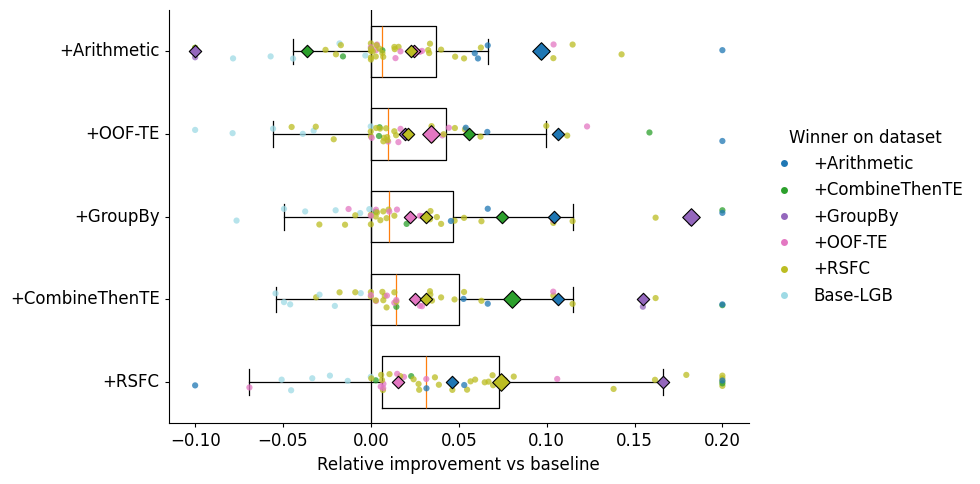

In [315]:
# Adapted call matching your current usage (same args / names reminded).
# Assumes you already defined ablation_boxplot_colored_by_best exactly as in the last code block.

# methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy", "OOF-TE_w_GroupBy"]

methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy"]
# methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy", "Cat-Pipeline", "PrepLightGBM"]
# methods_keep = ["RSFC", "Arithmetic", "Cat-Pipeline"]
# methods_keep = ["Cat-Pipeline", "Cat-Pipeline (keepcat)"]

### Ablation on decisions we made
# Arithmetic - prioritize division and products
# methods_keep = [i for i in prep_ablation_df.method.unique() if "Arithmetic" in i]
# methods_keep = [i for i in prep_ablation_df.method.unique() if "GroupBy" in i]
# methods_keep = [i for i in prep_ablation_df.method.unique() if "+" in i]
methods_keep = ["+Arithmetic", "+OOF-TE", "+CombineThenTE", "+GroupBy", "+RSFC"]

fig, ax, merged_long, best_by_ds, color_by_method = ablation_boxplot_colored_by_best(
    prep_ablation_df=prep_ablation_df.loc[prep_ablation_df.method.isin(methods_keep)],
    base_df=base_lgb_df,
    dataset_col="dataset",
    method_col="method",
    metric_col="metric_error",
    base_metric_col="LightGBM",          # baseline column in base_lgb_df
    baseline_name="Base-LGB",
    winner_rule="methods_or_baseline",   # baseline can win (and wins ties)
    winner_atol=1e-12,
    winner_rtol=0.0,
    order_by="median_score",
    # plot scoring + limits
    mode="relative",
    cap=(-0.1, 0.2),

    # optional tie dropping from plot (off in your example)
    drop_equal_to_baseline=False,

    # style
    figsize=(10, 5),
    jitter=0.10,
    point_size=20.0,
    point_alpha=0.75,
    title=None,

    mean_marker_size_main=80,
    mean_marker_size_other=40,
    xlabel_fontsize=12.0,
    font_size=12,


    # saving
    save_path="figures/prep_ablation_colored.pdf",
    dpi=300,
    transparent=True,
)


In [ ]:
ts_lgb_df = ta_results.loc[np.logical_and(
    ta_results.method=="GBM (tuned + ensemble)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "LightGBM"})

/tmp/ipykernel_633351/3067154448.py:287: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


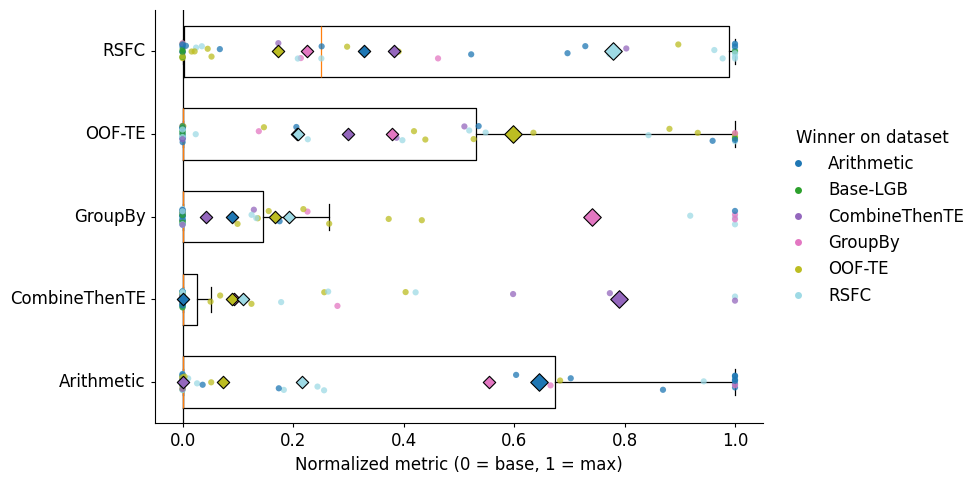

In [167]:
ts_lgb_df = ta_results.loc[np.logical_and(
    ta_results.method=="GBM (tuned + ensemble)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "LightGBM"})

# Adapted call matching your current usage (same args / names reminded).
# Assumes you already defined ablation_boxplot_colored_by_best exactly as in the last code block.

# methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy", "OOF-TE_w_GroupBy"]

methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy"]
# methods_keep = ["RSFC", "OOF-TE", "CombineThenTE", "Arithmetic", "GroupBy", "Cat-Pipeline", "PrepLightGBM"]
# methods_keep = ["RSFC", "Arithmetic", "Cat-Pipeline"]
# methods_keep = ["Cat-Pipeline", "Cat-Pipeline (keepcat)"]

### Ablation on decisions we made
# Arithmetic - prioritize division and products
# methods_keep = [i for i in prep_ablation_df.method.unique() if "Arithmetic" in i]
# methods_keep = [i for i in prep_ablation_df.method.unique() if "GroupBy" in i]

fig, ax, merged_long, best_by_ds, color_by_method = ablation_boxplot_colored_by_best(
    prep_ablation_df=prep_ablation_df.loc[prep_ablation_df.method.isin(methods_keep)],
    base_df=base_lgb_df,
    max_df=ts_lgb_df,
    dataset_col="dataset",
    method_col="method",
    metric_col="metric_error",
    base_metric_col="LightGBM",          # baseline column in base_lgb_df
    max_metric_col="LightGBM", # 
    baseline_name="Base-LGB",
    winner_rule="methods_or_baseline",   # baseline can win (and wins ties)
    winner_atol=1e-12,
    winner_rtol=0.0,

    # plot scoring + limits
    # mode="log_ratio",
    # cap=(-0.1, 0.2),

    # optional tie dropping from plot (off in your example)
    drop_equal_to_baseline=False,

    # style
    figsize=(10, 5),
    jitter=0.10,
    point_size=20.0,
    point_alpha=0.75,
    title=None,

    mean_marker_size_main=80,
    mean_marker_size_other=40,
    xlabel_fontsize=12.0,
    font_size=12,


    # saving
    save_path="figures/prep_ablation_colored.pdf",
    dpi=300,
    transparent=True,
)


In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


def ablation_boxplot_colored_by_best(
    prep_ablation_df: pd.DataFrame,
    base_df: pd.DataFrame,
    max_df: pd.DataFrame,  # NEW: dataframe providing the per-dataset maximum anchor
    *,
    dataset_col: str = "dataset",
    method_col: str = "method",
    metric_col: str = "metric_error",
    base_metric_col: str = "metric_error_baseLGB",  # column in base_df (MIN anchor)
    max_metric_col: str = "metric_error_max",       # column in max_df (MAX anchor)
    baseline_name: str = "Baseline",
    lower_is_better: bool = True,

    # score shown on x-axis: min-max normalization -> [0,1]
    eps: float = 1e-12,

    # methods shown and ordering
    method_order: list[str] | None = None,
    method_labels: dict[str, str] | None = None,  # method -> display label (can include '\n')

    # winner / color assignment
    winner_rule: str = "methods_or_baseline",  # "methods_only" | "methods_or_baseline" | "methods_if_beat_else_baseline"
    cmap_name: str = "tab20",

    # optional: remove per-method ties to baseline from the PLOT only
    drop_equal_to_baseline: bool = False,
    equal_atol: float = 0.0,
    equal_rtol: float = 0.0,

    # tie-breaking tolerance for winner selection (baseline wins ties)
    winner_atol: float = 0.0,
    winner_rtol: float = 0.0,

    # fat marker = mean of points belonging to the winner-group of that method
    show_winner_group_mean: bool = True,
    mean_marker: str = "D",
    mean_marker_size_main: float = 100.0,   # when method == winner
    mean_marker_size_other: float = 50.0,   # when method != winner
    mean_marker_edge: bool = True,
    mean_marker_edge_lw: float = 0.8,

    # legend
    legend: bool = True,
    legend_title: str = "Winner on dataset",
    legend_loc: str = "center left",
    legend_bbox_to_anchor: tuple[float, float] = (1.02, 0.5),
    legend_fontsize: float | None = None,

    # plot style
    figsize: tuple[float, float] = (6.8, 3.6),
    jitter: float = 0.10,
    point_size: float = 10.0,
    point_alpha: float = 0.75,
    box_linewidth: float = 0.9,
    spine_linewidth: float = 0.8,
    font_size: float = 8.0,
    title: str | None = None,
    x_label: str | None = None,
    xlabel_fontsize: float | None = None,

    # saving
    save_path: str | None = None,
    dpi: int = 300,
    transparent: bool = True,
    show: bool = True,
):
    """
    Horizontal boxplots of normalized score in [0,1] for many methods (long DF),
    with per-dataset points colored by the dataset's winner method.

    Normalization uses:
      - base_df as per-dataset MIN anchor (base_metric_col)
      - max_df  as per-dataset MAX anchor (max_metric_col)

    If lower_is_better:
        score = (max - metric) / (max - base)   -> base maps to 1, max maps to 0
    else:
        score = (metric - base) / (max - base)  -> base maps to 0, max maps to 1

    Returns:
      fig, ax, merged_long, best_method_by_dataset, color_by_method
    """

    # ---- Validate columns ----
    for c in [dataset_col, method_col, metric_col]:
        if c not in prep_ablation_df.columns:
            raise ValueError(f"prep_ablation_df missing column '{c}'")
    for c in [dataset_col, base_metric_col]:
        if c not in base_df.columns:
            raise ValueError(f"base_df missing column '{c}'")
    for c in [dataset_col, max_metric_col]:
        if c not in max_df.columns:
            raise ValueError(f"max_df missing column '{c}'")

    # ---- MIN anchor (baseline) per dataset ----
    base_small = base_df[[dataset_col, base_metric_col]].dropna().copy()
    base_small = base_small.rename(columns={base_metric_col: "_base_metric"})
    base_small = base_small.drop_duplicates(subset=[dataset_col], keep="last")

    # ---- MAX anchor per dataset ----
    max_small = max_df[[dataset_col, max_metric_col]].dropna().copy()
    max_small = max_small.rename(columns={max_metric_col: "_max_metric"})
    max_small = max_small.drop_duplicates(subset=[dataset_col], keep="last")

    # ---- Merge anchors into long df ----
    d_all = prep_ablation_df[[dataset_col, method_col, metric_col]].dropna().copy()
    d_all = d_all.rename(columns={metric_col: "_metric"})

    d_all = d_all.merge(base_small, on=dataset_col, how="inner")
    d_all = d_all.merge(max_small, on=dataset_col, how="inner")

    if d_all.empty:
        raise ValueError("After merging on dataset, no rows remain. Check dataset overlap / NaNs.")

    # ---- Optional: drop ties from PLOT only ----
    d_plot = d_all
    if drop_equal_to_baseline:
        tie_mask_plot = np.isclose(
            d_plot["_metric"].to_numpy(dtype=float),
            d_plot["_base_metric"].to_numpy(dtype=float),
            rtol=equal_rtol,
            atol=equal_atol,
            equal_nan=False,
        )
        d_plot = d_plot.loc[~tie_mask_plot].copy()
        if d_plot.empty:
            raise ValueError("All rows removed by drop_equal_to_baseline. Relax tolerances?")

    # ---- Method order ----
    if method_order is None:
        method_order = sorted(d_plot[method_col].unique().tolist())
    else:
        present = set(d_plot[method_col].unique())
        method_order = [m for m in method_order if m in present]
    if not method_order:
        raise ValueError("No methods to plot (method_order empty after filtering).")

    # ---- Compute normalized score: base -> 0, max -> 1 (allow outside range) ----
    base = d_plot["_base_metric"].to_numpy(dtype=float)
    mx = d_plot["_max_metric"].to_numpy(dtype=float)
    mval = d_plot["_metric"].to_numpy(dtype=float)

    denom = mx - base
    # avoid divide-by-zero; keep sign if denom is tiny
    denom_safe = np.where(np.abs(denom) < eps, np.sign(denom) * eps, denom)
    # if denom is exactly 0, np.sign(0)=0, so fix to +eps
    denom_safe = np.where(denom_safe == 0.0, eps, denom_safe)

    score = (mval - base) / denom_safe

    d_plot = d_plot.copy()
    d_plot["_score"] = score  # <-- NO CLIP

    default_xlabel = "Normalized metric (0 = base, 1 = max)"

    d_plot = d_plot.copy()
    d_plot["_score"] = np.clip(score, 0.0, 1.0)

    # ---- Winner computation (RAW metric, baseline wins ties) ----
    agg = d_all.groupby([dataset_col, method_col], as_index=False)["_metric"].mean()
    base_series = base_small.set_index(dataset_col)["_base_metric"]

    def _winner_methods_or_baseline_tiebreak(agg_methods: pd.DataFrame) -> dict:
        base_as_long = base_small.copy()
        base_as_long[method_col] = baseline_name
        base_as_long["_metric"] = base_as_long["_base_metric"]
        base_as_long = base_as_long[[dataset_col, method_col, "_metric"]]

        pool = pd.concat([agg_methods, base_as_long], ignore_index=True)
        pool["_is_base"] = (pool[method_col] == baseline_name)

        winners = {}
        for ds, g in pool.groupby(dataset_col, sort=False):
            vals = g["_metric"].to_numpy(dtype=float)

            best_val = vals.min() if lower_is_better else vals.max()
            if winner_atol or winner_rtol:
                is_best = np.isclose(vals, best_val, rtol=winner_rtol, atol=winner_atol)
            else:
                is_best = (vals == best_val)

            cand = g.loc[is_best].copy()

            # tie-break 1: baseline wins if among candidates
            if (cand["_is_base"]).any():
                winners[ds] = baseline_name
                continue

            # tie-break 2: deterministic by method name
            winners[ds] = cand.sort_values(method_col, kind="mergesort").iloc[0][method_col]

        return winners

    if winner_rule not in {
        "methods_only",
        "methods_or_baseline",
        "methods_if_beat_else_baseline",
    }:
        raise ValueError(
            "winner_rule must be one of: 'methods_only', 'methods_or_baseline', 'methods_if_beat_else_baseline'"
        )

    if winner_rule == "methods_only":
        if lower_is_better:
            idx = agg.groupby(dataset_col)["_metric"].idxmin()
        else:
            idx = agg.groupby(dataset_col)["_metric"].idxmax()
        best_method_by_dataset = (
            agg.loc[idx, [dataset_col, method_col]]
            .set_index(dataset_col)[method_col]
            .to_dict()
        )

    elif winner_rule == "methods_or_baseline":
        best_method_by_dataset = _winner_methods_or_baseline_tiebreak(agg)

    else:  # "methods_if_beat_else_baseline" -> draw => baseline
        if lower_is_better:
            idx_m = agg.groupby(dataset_col)["_metric"].idxmin()
        else:
            idx_m = agg.groupby(dataset_col)["_metric"].idxmax()

        best_m = agg.loc[idx_m].set_index(dataset_col)[method_col]
        best_m_val = agg.loc[idx_m].set_index(dataset_col)["_metric"]

        best_method_by_dataset = {}
        for ds, base_val in base_series.items():
            if ds in best_m.index:
                mval_ds = float(best_m_val.loc[ds])
                base_ds = float(base_val)
                draw = (
                    np.isclose(mval_ds, base_ds, rtol=winner_rtol, atol=winner_atol)
                    if (winner_atol or winner_rtol)
                    else (mval_ds == base_ds)
                )
                if lower_is_better:
                    method_beats = (mval_ds < base_ds) and not draw
                else:
                    method_beats = (mval_ds > base_ds) and not draw
                best_method_by_dataset[ds] = best_m.loc[ds] if method_beats else baseline_name
            else:
                best_method_by_dataset[ds] = baseline_name

    # ---- Colors: one per possible winner ----
    winners = sorted(set(best_method_by_dataset.values()))
    cmap = plt.get_cmap(cmap_name, max(len(winners), 1))
    color_by_method = {m: cmap(i) for i, m in enumerate(winners)}
    color_by_dataset = {ds: color_by_method[m] for ds, m in best_method_by_dataset.items()}

    # ---- Labels for y-ticks and legend ----
    def display_name(m: str) -> str:
        return method_labels.get(m, m) if method_labels else m

    y_labels = [display_name(m) for m in method_order]

    # ---- Prepare boxplot data + dataset arrays (for coloring points) ----
    data = []
    dataset_lists = []
    for m in method_order:
        sub = d_plot.loc[d_plot[method_col] == m, [dataset_col, "_score"]].copy()
        data.append(sub["_score"].to_numpy())
        dataset_lists.append(sub[dataset_col].to_numpy())

    if legend_fontsize is None:
        legend_fontsize = font_size

    # ---- Plot ----
    with plt.rc_context({
        "font.size": font_size,
        "axes.labelsize": font_size,
        "axes.titlesize": font_size,
        "xtick.labelsize": font_size,
        "ytick.labelsize": font_size,
        "axes.linewidth": spine_linewidth,
        "pdf.fonttype": 42,
        "ps.fonttype": 42,
    }):
        fig, ax = plt.subplots(figsize=figsize)

        common_props = dict(linewidth=box_linewidth)
        ax.boxplot(
            data,
            labels=y_labels,
            vert=False,
            showfliers=False,
            widths=0.62,
            boxprops=common_props,
            whiskerprops=common_props,
            capprops=common_props,
            medianprops=common_props,
        )

        rng = np.random.default_rng(0)
        for i, ds_arr in enumerate(dataset_lists, start=1):
            x = data[i - 1]
            y = i + rng.uniform(-jitter, jitter, size=len(x))
            colors = [color_by_dataset.get(ds, (0, 0, 0, 1)) for ds in ds_arr]
            ax.scatter(x, y, s=point_size, alpha=point_alpha, linewidths=0, zorder=3, c=colors)

        # Fat markers: mean over datasets belonging to each winner-group
        if show_winner_group_mean:
            for i, m in enumerate(method_order, start=1):
                ds_arr = np.asarray(dataset_lists[i - 1])
                x_arr = np.asarray(data[i - 1])
                if len(x_arr) == 0:
                    continue

                for winner_m, color in color_by_method.items():
                    if winner_m == baseline_name:
                        continue

                    mask = np.array(
                        [best_method_by_dataset.get(ds) == winner_m for ds in ds_arr],
                        dtype=bool,
                    )
                    if not mask.any():
                        continue

                    mean_x = float(np.mean(x_arr[mask]))

                    is_self = (winner_m == m)
                    size = mean_marker_size_main if is_self else mean_marker_size_other

                    ax.scatter(
                        [mean_x], [i],
                        s=size,
                        marker=mean_marker,
                        c=[color],
                        edgecolors="black" if mean_marker_edge else "none",
                        linewidths=mean_marker_edge_lw if mean_marker_edge else 0.0,
                        zorder=4 if is_self else 3.8,
                    )

        # For a [0,1] scale, a reference line at 0.5 is often more meaningful than 0.0,
        # but keeping 0.0 can still be useful. Uncomment if you prefer 0.5:
        # ax.axvline(0.5, color="black", linewidth=box_linewidth)
        ax.axvline(0.0, color="black", linewidth=box_linewidth)

        ax.set_xlabel(
            x_label if x_label is not None else default_xlabel,
            fontsize=(xlabel_fontsize if xlabel_fontsize is not None else font_size),
        )
        ax.set_ylabel("")
        if title:
            ax.set_title(title)

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_linewidth(spine_linewidth)
        ax.spines["bottom"].set_linewidth(spine_linewidth)
        ax.tick_params(axis="both", width=spine_linewidth, length=3)

        for t in ax.get_yticklabels():
            t.set_va("center")
            t.set_linespacing(0.95)

        if legend:
            handles = [
                Line2D([0], [0], marker="o", linestyle="None",
                       markersize=5, markerfacecolor=color_by_method[m],
                       markeredgewidth=0, label=display_name(m))
                for m in winners
            ]
            ax.legend(
                handles=handles,
                title=legend_title,
                fontsize=legend_fontsize,
                title_fontsize=legend_fontsize,
                loc=legend_loc,
                bbox_to_anchor=legend_bbox_to_anchor,
                frameon=False,
                borderaxespad=0.0,
            )

        fig.tight_layout()

        if save_path is not None:
            fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.01, transparent=transparent)

        if show:
            plt.show()

    merged_long = d_plot[[dataset_col, method_col]].copy()
    merged_long["metric"] = d_plot["_metric"].astype(float)
    merged_long["score"] = d_plot["_score"].astype(float)

    return fig, ax, merged_long, best_method_by_dataset, color_by_method

In [ ]:
prep_lgb_df = ta_results.loc[np.logical_and(
    ta_results.method=="PREP_GBM (default)",
    ta_results.fold==fold),["dataset", "metric_error"]].rename(columns={"metric_error": "PrepLightGBM"})

In [153]:
dat_res = pd.DataFrame({dat: {mod: prep_ablation_df.loc[np.logical_and(prep_ablation_df.dataset==dat, prep_ablation_df.method==mod), "metric_error"].values for mod in prep_ablation_df.method.unique()} for dat in prep_ablation_df.dataset.unique()}).T
base_dict_map = dict(base_lgb_df[["dataset","LightGBM"]].values)
base_ser = pd.Series(dat_res.index).map(base_dict_map)
base_ser.index = dat_res.index

In [154]:
(base_ser-dat_res["GroupBy"].astype(float)).sort_values(ascending=False).round(3)

healthcare_insurance_expenses                 38.576
diamonds                                      16.811
Another-Dataset-on-used-Fiat-500               8.854
Food_Delivery_Time                             0.260
students_dropout_and_academic_success          0.008
Is-this-a-good-customer                        0.008
Marketing_Campaign                             0.007
Diabetes130US                                  0.005
credit-g                                       0.005
kddcup09_appetency                             0.004
seismic-bumps                                  0.002
Bank_Customer_Churn                            0.002
SDSS17                                         0.002
anneal                                         0.001
qsar-biodeg                                    0.001
HR_Analytics_Job_Change_of_Data_Scientists     0.000
bank-marketing                                 0.000
online_shoppers_intention                      0.000
credit_card_clients_default                   

In [155]:
(base_ser-dat_res["AbsoluteGroupBy"].astype(float)).sort_values(ascending=False).round(3)

diamonds                                      3.741
Is-this-a-good-customer                       0.020
credit-g                                      0.019
anneal                                        0.012
Food_Delivery_Time                            0.007
Marketing_Campaign                            0.006
students_dropout_and_academic_success         0.004
coil2000_insurance_policies                   0.003
HR_Analytics_Job_Change_of_Data_Scientists    0.002
SDSS17                                        0.001
qsar-biodeg                                   0.001
credit_card_clients_default                   0.001
MIC                                           0.000
Diabetes130US                                 0.000
customer_satisfaction_in_airline              0.000
NATICUSdroid                                  0.000
APSFailure                                    0.000
houses                                        0.000
diabetes                                      0.000
maternal_hea

In [ ]:
'OOF-TE_w_GroupBy'

In [131]:
pd.Series(best_by_ds).value_counts()

Base-LGB         18
RSFC             10
Arithmetic        9
OOF-TE            7
CombineThenTE     4
GroupBy           3
Name: count, dtype: int64

In [118]:
pd.Series(best_by_ds)

APSFailure                                        Base-LGB
Amazon_employee_access                        Cat-Pipeline
Another-Dataset-on-used-Fiat-500                  Base-LGB
Bank_Customer_Churn                           Cat-Pipeline
Bioresponse                                       Base-LGB
Diabetes130US                                 Cat-Pipeline
E-CommereShippingData                                 RSFC
Fitness_Club                                  Cat-Pipeline
Food_Delivery_Time                            Cat-Pipeline
GiveMeSomeCredit                                  Base-LGB
HR_Analytics_Job_Change_of_Data_Scientists        Base-LGB
Is-this-a-good-customer                       Cat-Pipeline
MIC                                           Cat-Pipeline
Marketing_Campaign                                Base-LGB
NATICUSdroid                                  Cat-Pipeline
QSAR-TID-11                                     Arithmetic
QSAR_fish_toxicity                              Arithmet

### Combined trials vs. TabPrep-only trials

In [463]:
nonprep_res_path = {
    "RealTabPFN2.5": "/home/atschalz/.cache/tabarena/artifacts/tabarena-2025-11-12/methods/RealTabPFN-v2.5/results/model_results.parquet",
    "LightGBM": "/home/atschalz/.cache/tabarena/artifacts/tabarena-2025-06-12/methods/LightGBM/results/model_results.parquet",
    "TabM": "/home/atschalz/.cache/tabarena/artifacts/tabarena-2025-06-12/methods/TabM_GPU/results/model_results.parquet",
    # ""
    }

In [464]:
df_combined_trials = pd.DataFrame()
# df_prep_trials = pd.DataFrame(index=all_model_results.dataset.unique())
for use_model in ["RealTabPFN2.5", "LightGBM", "TabM"]:
    df_old = pd.read_parquet(nonprep_res_path[use_model])
    df_old = df_old.loc[df_old.fold==0]
    if use_model == "LightGBM":
        comb_df = pd.concat([
            df_old,
            ta_results.loc[np.logical_and(ta_results.fold==0, ta_results.ta_name==f"Prep{use_model}")]
        ]).reset_index(drop=True)
    else:
        comb_df = pd.concat([
            df_old,
            all_model_results.loc[np.logical_and(all_model_results.fold==0, all_model_results.ta_name==f"Prep{use_model}")]
        ]).reset_index(drop=True)

    df_combined_trials[f"{use_model}_combined"] = comb_df.groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])
    df_combined_trials[f"{use_model}_baseModel"] = df_old.groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])
    if use_model == "LightGBM":
        df_combined_trials[f"{use_model}_prepModel"] = ta_results.loc[np.logical_and(ta_results.fold==0, ta_results.ta_name==f"Prep{use_model}")].groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])
    else:
        df_combined_trials[f"{use_model}_prepModel"] = all_model_results.loc[np.logical_and(all_model_results.fold==0, all_model_results.ta_name==f"Prep{use_model}")].groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])

df_combined_trials


/tmp/ipykernel_1064549/1387584964.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_combined_trials[f"{use_model}_combined"] = comb_df.groupby("dataset").apply(lambda x: x.metric_error.loc[x.metric_error_val.idxmin()])
/tmp/ipykernel_1064549/1387584964.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_combined_trials[f"{use_model}_baseModel"] = df_old.groupby("dataset").apply(lambda x: x.metric_error.loc[

,RealTabPFN2.5_combined,RealTabPFN2.5_baseModel,RealTabPFN2.5_prepModel,LightGBM_combined,LightGBM_baseModel,LightGBM_prepModel,TabM_combined,TabM_baseModel,TabM_prepModel
dataset,,,,,,,,,
APSFailure,0.005023,0.005023,0.010102,0.003599,0.005129,0.003599,0.005237,0.005237,0.006326
Amazon_employee_access,0.121649,0.154477,0.121649,0.115855,0.155627,0.115855,0.121912,0.159647,0.121912
Another-Dataset-on-used-Fiat-500,671.234962,697.417691,671.234962,673.947460,709.295170,673.947460,721.954437,721.954437,683.296127
Bank_Customer_Churn,0.119812,0.119812,0.124792,0.125410,0.125569,0.125410,0.121159,0.121159,0.127873
Bioresponse,0.111488,0.111488,0.116786,0.107018,0.112133,0.107018,0.123889,0.123889,0.121358
Diabetes130US,0.333989,0.333989,0.343123,0.316682,0.322105,0.316682,0.318579,0.326425,0.318579
E-CommereShippingData,0.260676,0.258422,0.260676,0.259559,0.259995,0.259559,0.263546,0.263546,0.259265
Fitness_Club,0.190232,0.190232,0.192548,0.197841,0.197841,0.196291,0.194476,0.194476,0.193058
Food_Delivery_Time,7.208150,7.424939,7.208150,7.221560,7.420115,7.221560,7.241815,7.692887,7.241815


In [465]:
df_combined_trials.idxmin(axis=1).value_counts()

RealTabPFN2.5_combined     24
LightGBM_combined          12
TabM_combined               5
RealTabPFN2.5_baseModel     2
LightGBM_baseModel          2
RealTabPFN2.5_prepModel     2
TabM_prepModel              2
TabM_baseModel              1
LightGBM_prepModel          1
Name: count, dtype: int64

/tmp/ipykernel_1064549/4024877155.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipykernel_1064549/4024877155.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


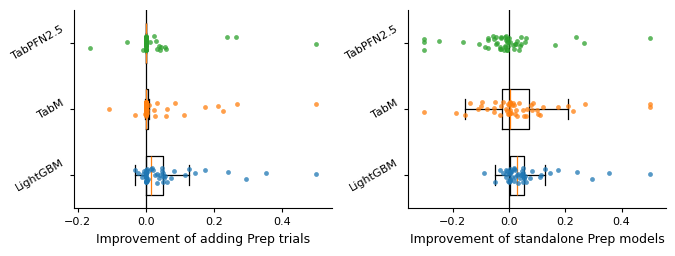

In [467]:
fig, (axL, axR), (scores_combined, scores_prep) = boxplot_models_combined_vs_tabprep(
    df=df_combined_trials,  # index = dataset names
    models=["LightGBM", "TabM", "RealTabPFN2.5"],
    model_labels=["LightGBM", "TabM", "TabPFN2.5"],
    baseline_cfg="baseModel",
    left_cfg="combined",
    right_cfg="prepModel",
    mode="log_ratio",
    lower_is_better=True,
    cap_left=(-0.5, 0.5),
    cap_right=(-0.3, 0.5),
    horizontal=True,
    share_scale=False,
    titles = (None, None),
    save_path="figures/combined_trials_vs_prep_only.pdf",
    dpi=300,
    transparent=True,
)


In [468]:
df_components[["BaseLGB","+Arithmetic", "+OOF-TE", "+CombineThenTE", "+GroupBy", "+RSFC"]]

,BaseLGB,+Arithmetic,+OOF-TE,+CombineThenTE,+GroupBy,+RSFC
dataset,,,,,,
APSFailure,0.005363,0.004598,NaN,NaN,NaN,0.004496
Bank_Customer_Churn,0.130638,0.134011,0.134734,0.134707,0.132560,0.129739
Bioresponse,0.111204,0.107968,0.106686,0.107968,0.107968,0.109111
Diabetes130US,0.342632,0.342264,NaN,NaN,NaN,0.318913
Fitness_Club,0.206897,0.216056,0.214912,0.212946,0.211046,0.213797
GiveMeSomeCredit,0.130767,0.130757,NaN,NaN,NaN,0.130003
MIC,0.522140,0.530437,0.519731,0.508586,0.511522,0.510165
Marketing_Campaign,0.076300,0.077816,0.075578,0.077660,0.076031,0.074204
NATICUSdroid,0.015610,0.015610,0.015610,0.015610,0.015610,0.011635


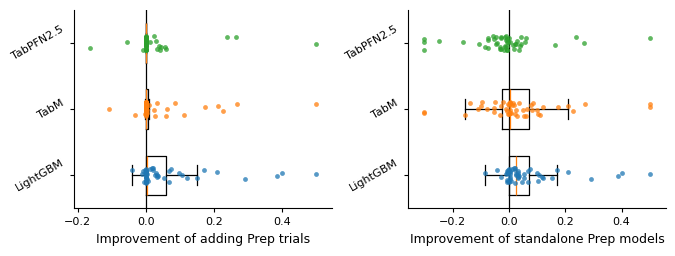

In [23]:
fig, (axL, axR), (scores_combined, scores_prep) = boxplot_models_combined_vs_tabprep(
    df=df_combined_trials,  # index = dataset names
    models=["LightGBM", "TabM", "RealTabPFN-v2.5"],
    model_labels=["LightGBM", "TabM", "TabPFN2.5"],
    baseline_cfg="baseModel",
    left_cfg="combined",
    right_cfg="prepModel",
    mode="log_ratio",
    lower_is_better=True,
    cap_left=(-0.5, 0.5),
    cap_right=(-0.3, 0.5),
    horizontal=True,
    share_scale=False,
    titles = (None, None),
    save_path="figures/combined_trials_vs_prep_only.pdf",
    dpi=300,
    transparent=True,
)


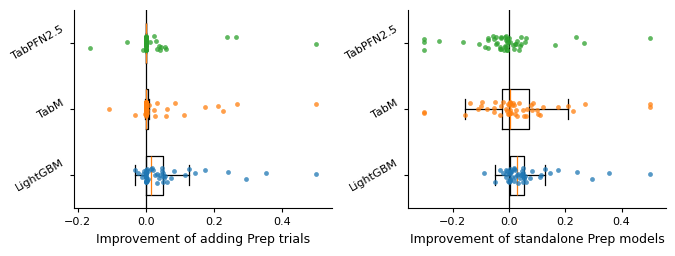

In [131]:
fig, (axL, axR), (scores_combined, scores_prep) = boxplot_models_combined_vs_tabprep(
    df=df_combined_trials,  # index = dataset names
    models=["LightGBM", "TabM", "RealTabPFN2.5"],
    model_labels=["LightGBM", "TabM", "TabPFN2.5"],
    baseline_cfg="baseModel",
    left_cfg="combined",
    right_cfg="prepModel",
    mode="log_ratio",
    lower_is_better=True,
    cap_left=(-0.5, 0.5),
    cap_right=(-0.3, 0.5),
    horizontal=True,
    share_scale=False,
    titles = (None, None),
    save_path="figures/combined_trials_vs_prep_only.pdf",
    dpi=300,
    transparent=True,
)


In [149]:
comb_results

,dataset,fold,ta_name,metric_error,method_subtype
0,SDSS17,0,PrepTabM,0.068588,default
1,SDSS17,0,PrepTabM,0.066061,tuned
2,SDSS17,0,PrepTabM,0.065874,tuned_ensemble
3,GiveMeSomeCredit,0,PrepTabM,0.131013,default
4,GiveMeSomeCredit,0,PrepTabM,0.130171,tuned
...,...,...,...,...,...
48853,wine_quality,4,RealTabPFN2.5,0.579034,tuned_ensemble
48854,wine_quality,5,RealTabPFN2.5,0.609024,tuned_ensemble
48855,wine_quality,6,RealTabPFN2.5,0.609299,tuned_ensemble
48856,wine_quality,7,RealTabPFN2.5,0.630704,tuned_ensemble


### Get results on TabArena

In [152]:
comb_results_use = comb_results.loc[comb_results['method_subtype']=="tuned_ensemble"]
comb_results_use = comb_results_use.loc[comb_results_use.fold==0]

dat_map = {
    "HR_Analytics_Job_Change_of_Data_Scientists": "HR_Analytics",
    "students_dropout_and_academic_success": "students_dropout",
    "blood-transfusion-service-center": 'blood-transfusion',
    "Another-Dataset-on-used-Fiat-500": "Fiat-500", 
    "coil2000_insurance_policies": "coil2000",
    "hazelnut-spread-contaminant-detection": "hazelnut-spread",
    "taiwanese_bankruptcy_prediction": "taiwanese_bankruptcy",
    "polish_companies_bankruptcy": "polish_companies",
    "healthcare_insurance_expenses": "healthcare_insurance",
    "in_vehicle_coupon_recommendation": "in_vehicle",
    "Amazon_employee_access": "Amazon_employee",
    "concrete_compressive_strength": "concrete",
    "customer_satisfaction_in_airline": "customer_satisfaction",
    "E-CommereShippingData": "E-Commerce",
    "online_shoppers_intention": "online_shoppers",
    "Is-this-a-good-customer": "Is-good-customer",
    "Food_Delivery_Time": "Food_Delivery",
    "credit_card_clients_default": "credit_card_clients",
    }
comb_results_use.dataset = comb_results_use.dataset.apply(lambda x: dat_map.get(x, x))

list(comb_results_use.dataset.unique())

['SDSS17',
 'GiveMeSomeCredit',
 'customer_satisfaction',
 'blood-transfusion',
 'HR_Analytics',
 'credit-g',
 'splice',
 'anneal',
 'diamonds',
 'miami_housing',
 'Fiat-500',
 'maternal_health_risk',
 'E-Commerce',
 'heloc',
 'coil2000',
 'Bioresponse',
 'Amazon_employee',
 'polish_companies',
 'hiva_agnostic',
 'churn',
 'online_shoppers',
 'Bank_Customer_Churn',
 'Marketing_Campaign',
 'healthcare_insurance',
 'MIC',
 'qsar-biodeg',
 'Diabetes130US',
 'jm1',
 'wine_quality',
 'houses',
 'seismic-bumps',
 'QSAR-TID-11',
 'Food_Delivery',
 'airfoil_self_noise',
 'Fitness_Club',
 'concrete',
 'bank-marketing',
 'in_vehicle',
 'diabetes',
 'students_dropout',
 'QSAR_fish_toxicity',
 'hazelnut-spread',
 'website_phishing',
 'Is-good-customer',
 'physiochemical_protein',
 'kddcup09_appetency',
 'credit_card_clients',
 'NATICUSdroid',
 'superconductivity',
 'taiwanese_bankruptcy',
 'APSFailure']

In [157]:
comb_results_use.ta_name.unique()

array(['PrepTabM', 'PrepRealTabPFN2.5', 'CatBoost', 'ExtraTrees',
       'LightGBM', 'NeuralNetFastAI', 'NeuralNetTorch', 'RandomForest',
       'XGBoost', 'ModernNCA_GPU', 'TabM', 'TabPFNv2_GPU',
       'ExplainableBM', 'RealMLP_GPU', 'xRFM_GPU', 'LinearModel',
       'KNeighbors', 'PrepLightGBM', 'PrepLinearModel', 'TabDPT_GPU',
       'RealTabPFN2.5'], dtype=object)

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Iterable, Optional, Tuple, Dict, Union

def normalized_model_means_barplot(
    df: pd.DataFrame,
    metric: str = "metric_error",              # default changed as requested
    dataset_col: str = "dataset",
    model_col: str = "ta_name",
    method_col: Optional[str] = "method_subtype",
    fold_col: Optional[str] = "fold",
    normalize: str = "minmax",                 # "minmax" | "rank" | "zscore"
    higher_is_better: bool = False,

    # Filtering (normalization still uses ALL rows)
    plot_models: Optional[Iterable[str]] = None,
    plot_methods: Optional[Iterable[str]] = None,

    # Coloring
    model_colors: Optional[Union[Dict[str, str], str]] = None,  # dict or colormap name

    # Label/formatting options
    hide_method_in_labels: Optional[Iterable[str]] = ("tuned_ensemble",),  # drop this from y labels
    y_label_rotation: float = 0,           # rotate y tick labels (degrees)
    y_label_ha: str = "right",             # alignment after rotation: "left"|"center"|"right"

    # Publication styling
    figsize: Tuple[float, float] = (7.0, 4.0),
    dpi: int = 300,
    font_size: float = 13,
    tick_size: Optional[float] = None,
    label_size: Optional[float] = None,
    spine_width: float = 1.2,
    grid: bool = True,
    grid_axis: str = "x",
    grid_alpha: float = 0.25,
    x_label: str = "Mean normalized error (lower is better)",
    ax=None,
    save_path: Optional[str] = None,
):
    """
    Publication-ready horizontal bar chart:
      - normalize within each dataset using ALL rows
      - average within dataset (across folds if present)
      - mean across datasets per model(+method)
      - larger fonts, no title, cleaner labels
      - option to omit 'tuned_ensemble' from y labels
      - optional rotated y labels
    Returns (df_dataset_avg, df_model_mean, ax)
    """

    # ---- validation ----
    required = {metric, dataset_col, model_col}
    if method_col is not None:
        required.add(method_col)
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Missing required columns: {sorted(missing)}")

    # sensible default font sizing
    if tick_size is None:
        tick_size = font_size
    if label_size is None:
        label_size = font_size + 1

    d = df.copy()
    d["_metric_for_norm"] = d[metric].astype(float)
    if higher_is_better:
        d["_metric_for_norm"] = -d["_metric_for_norm"]

    # ---- normalize per dataset (ALL rows) ----
    norm = normalize.lower()
    if norm == "minmax":
        def _minmax(x):
            rng = x.max() - x.min()
            if np.isclose(rng, 0.0):
                return pd.Series(np.zeros(len(x)), index=x.index)
            return (x - x.min()) / rng
        d["norm_score"] = d.groupby(dataset_col)["_metric_for_norm"].transform(_minmax)

    elif norm == "rank":
        d["norm_score"] = (
            d.groupby(dataset_col)["_metric_for_norm"]
             .rank(method="average", ascending=True, pct=True)
        )

    elif norm == "zscore":
        def _z(x):
            s = x.std(ddof=0)
            if np.isclose(s, 0.0):
                return pd.Series(np.zeros(len(x)), index=x.index)
            return (x - x.mean()) / s
        d["norm_score"] = d.groupby(dataset_col)["_metric_for_norm"].transform(_z)

    else:
        raise ValueError("normalize must be one of: 'minmax', 'rank', 'zscore'")

    # ---- aggregate across folds within dataset/model/method ----
    group_cols = [dataset_col, model_col] + ([method_col] if method_col else [])
    df_dataset_avg = d.groupby(group_cols, as_index=False)["norm_score"].mean()

    # ---- mean across datasets -> per model/method ----
    model_group_cols = [model_col] + ([method_col] if method_col else [])
    df_model_mean = (
        df_dataset_avg.groupby(model_group_cols, as_index=False)["norm_score"]
        .mean()
        .sort_values("norm_score", ascending=True)
    )

    # ---- apply plot filters (AFTER normalization) ----
    if plot_models is not None:
        plot_models = set(plot_models)
        df_dataset_avg = df_dataset_avg[df_dataset_avg[model_col].isin(plot_models)]
        df_model_mean = df_model_mean[df_model_mean[model_col].isin(plot_models)]

    if plot_methods is not None and method_col is not None:
        plot_methods = set(plot_methods)
        df_dataset_avg = df_dataset_avg[df_dataset_avg[method_col].isin(plot_methods)]
        df_model_mean = df_model_mean[df_model_mean[method_col].isin(plot_methods)]

    if len(df_model_mean) == 0:
        raise ValueError("No rows to plot after applying plot filters.")

    # ---- build y labels (omit tuned_ensemble if requested) ----
    hide_set = set(hide_method_in_labels) if hide_method_in_labels else set()

    if method_col:
        def _make_label(row):
            m = str(row[model_col])
            meth = str(row[method_col])
            if meth in hide_set:
                return m
            return f"{m} | {meth}"
        y_labels = df_model_mean.apply(_make_label, axis=1)
    else:
        y_labels = df_model_mean[model_col].astype(str)

    # ---- choose colors ----
    if model_colors is None:
        colors = None
    elif isinstance(model_colors, dict):
        colors = [model_colors.get(m, "0.5") for m in df_model_mean[model_col]]
    elif isinstance(model_colors, str):
        cmap = plt.get_cmap(model_colors)
        uniq_models = list(pd.unique(df_model_mean[model_col]))
        color_map = {m: cmap(i / max(len(uniq_models) - 1, 1)) for i, m in enumerate(uniq_models)}
        colors = [color_map[m] for m in df_model_mean[model_col]]
    else:
        raise ValueError("model_colors must be dict, colormap name, or None")

    # ---- plot ----
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    else:
        fig = ax.figure
        fig.set_dpi(dpi)

    ax.barh(y_labels, df_model_mean["norm_score"].to_numpy(), color=colors)

    # labels & ticks
    ax.set_xlabel(x_label, fontsize=label_size)
    ax.tick_params(axis="both", labelsize=tick_size, width=spine_width)

    # rotate y tick labels for readability (optional)
    for lab in ax.get_yticklabels():
        lab.set_rotation(y_label_rotation)
        lab.set_ha(y_label_ha)

    # cosmetics: spines & grid
    for side in ["top", "right"]:
        ax.spines[side].set_visible(False)
    for side in ["left", "bottom"]:
        ax.spines[side].set_linewidth(spine_width)

    if grid:
        ax.grid(True, axis=grid_axis, alpha=grid_alpha, linewidth=spine_width * 0.6)
        ax.set_axisbelow(True)

    # best at top
    ax.invert_yaxis()

    # no title (publication)
    ax.set_title("")

    fig.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)
    return df_dataset_avg, df_model_mean, ax



In [229]:
comb_results_use.ta_name.unique()

array(['PrepTabM', 'PrepRealTabPFN2.5', 'CatBoost', 'ExtraTrees',
       'LightGBM', 'NeuralNetFastAI', 'NeuralNetTorch', 'RandomForest',
       'XGBoost', 'ModernNCA_GPU', 'TabM', 'TabPFNv2_GPU',
       'ExplainableBM', 'RealMLP_GPU', 'xRFM_GPU', 'LinearModel',
       'KNeighbors', 'PrepLightGBM', 'PrepLinearModel', 'TabDPT_GPU',
       'RealTabPFN2.5'], dtype=object)

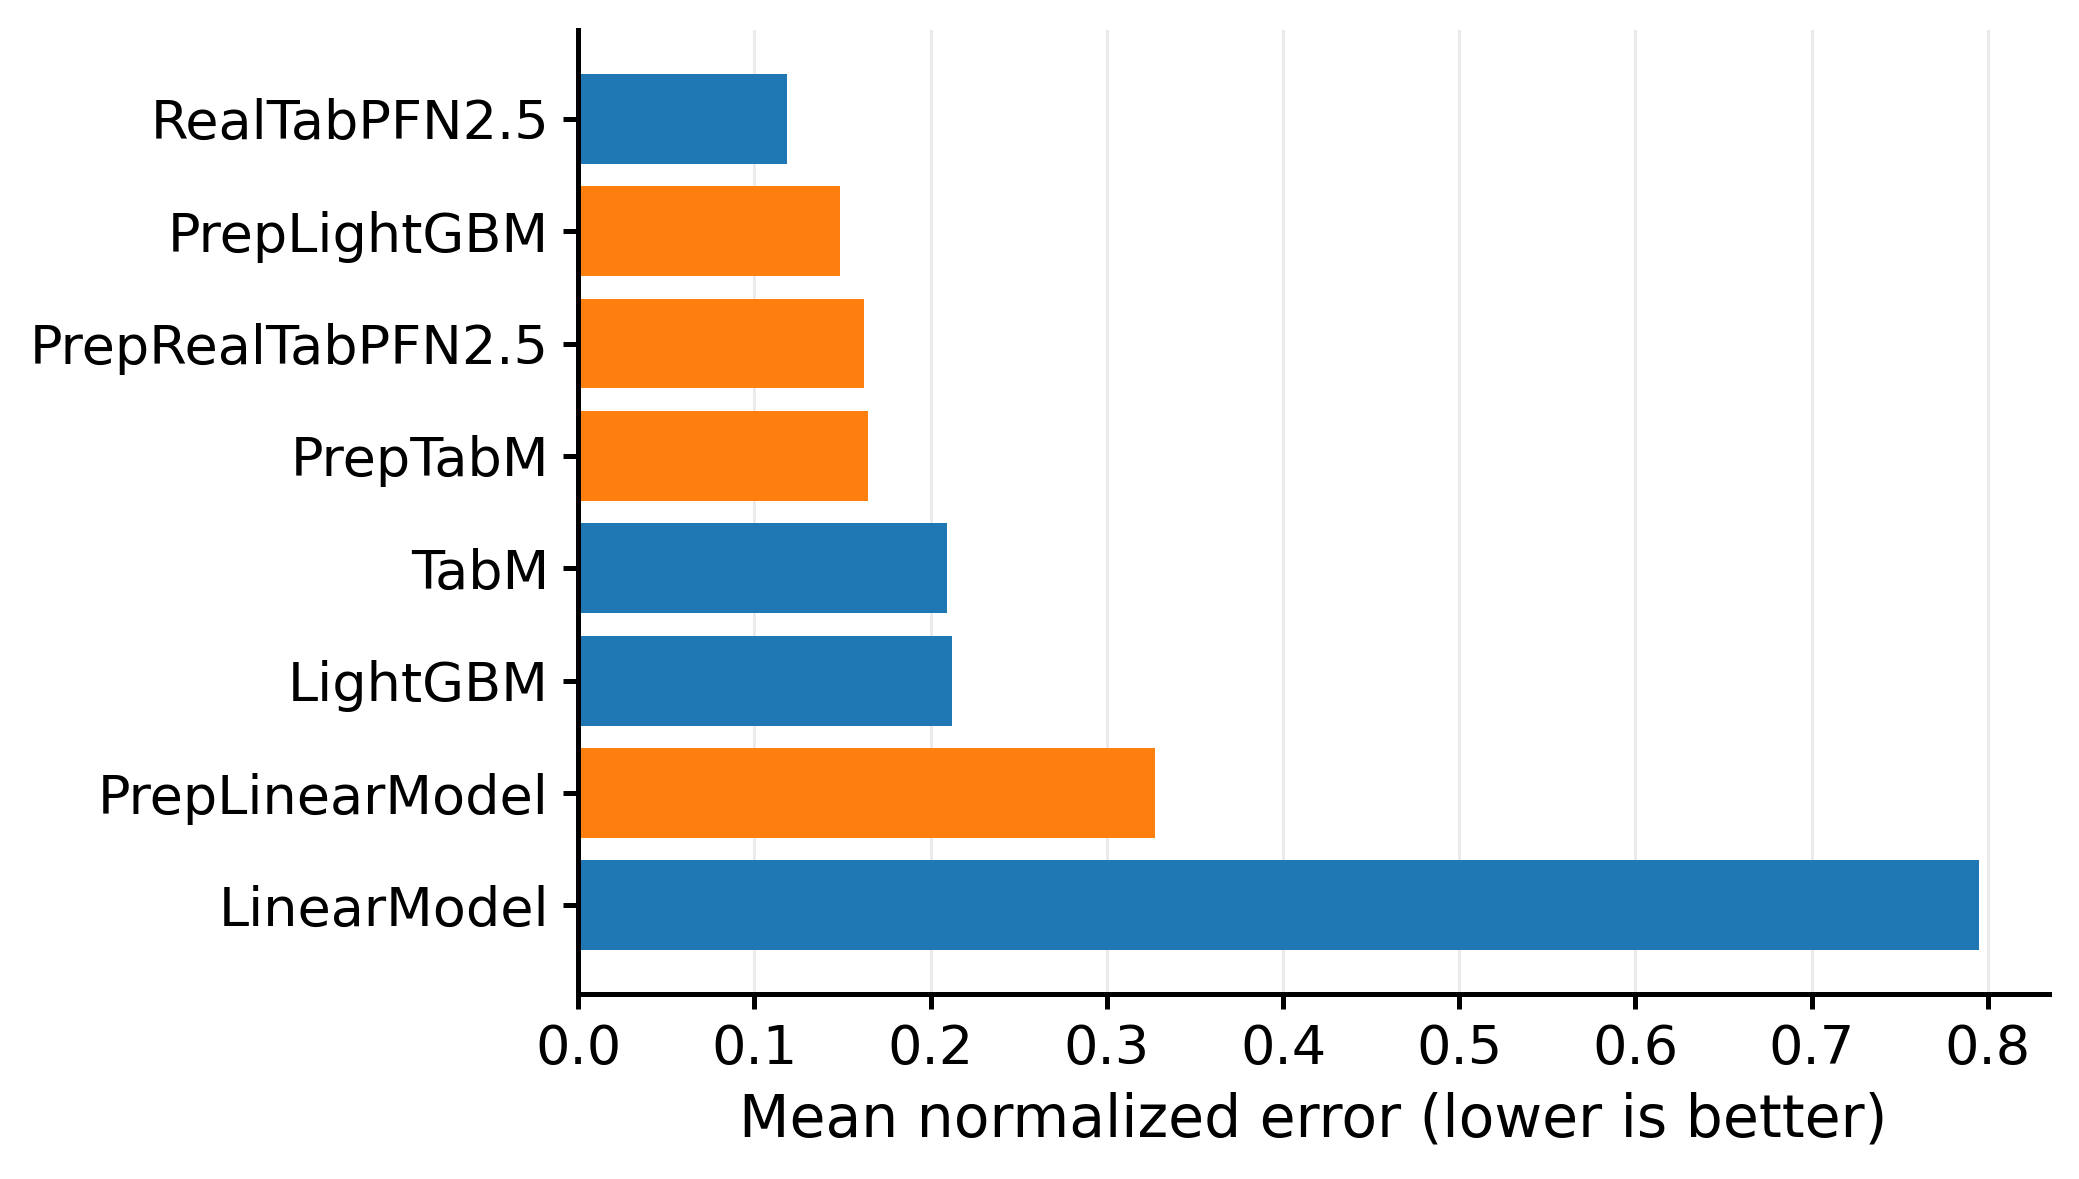

In [234]:

plot_models = [
    "LinearModel", "PrepLinearModel", 
    "LightGBM", "PrepLightGBM", 
    "TabM", "PrepTabM", 
    "RealTabPFN2.5", "PrepRealTabPFN2.5",
    # "RealMLP_GPU"
    ]
colors = {
    "LinearModel": "#1f77b4",
    "LightGBM": "#1f77b4",
    "TabM": "#1f77b4",
    "RealTabPFN2.5": "#1f77b4",
    "PrepLinearModel": "#ff7f0e",
    "PrepLightGBM": "#ff7f0e",
    "PrepTabM": "#ff7f0e",
    "PrepRealTabPFN2.5": "#ff7f0e",
    # "RealMLP_GPU": "black",
}

_ = normalized_model_means_barplot(
    comb_results_use,
    plot_models=plot_models,
    model_colors=colors,
)

In [235]:
comb_results_use_bar = comb_results_use.copy()

for dataset_name in comb_results_use_bar.dataset.unique():

    for model_name in ["TabM", "LinearModel", "LightGBM", "RealTabPFN2.5"]:
        prep = comb_results_use_bar.loc[np.logical_and(comb_results_use_bar.dataset==dataset_name, comb_results_use_bar.ta_name==f"Prep{model_name}")]
        base = comb_results_use_bar.loc[np.logical_and(comb_results_use_bar.dataset==dataset_name, comb_results_use_bar.ta_name==model_name)]
        if prep.shape[0]==0 or base.shape[0]==0:
            continue
        if base.metric_error_val.values[0] < prep.metric_error_val.values[0]:       
            comb_results_use_bar.loc[np.logical_and(comb_results_use_bar.dataset==dataset_name, comb_results_use_bar.ta_name==f"Prep{model_name}"),"metric_error"] = base.metric_error.values[0]
            # print(f"{model_name}: {base.metric_error_val.values[0]:.4f}, {prep.metric_error_val.values[0]:.4f}")

comb_results_use_bar
    

,dataset,fold,ta_name,metric_error,metric_error_val,method_subtype
2,SDSS17,0,PrepTabM,0.065874,0.067055,tuned_ensemble
5,GiveMeSomeCredit,0,PrepTabM,0.129222,0.135124,tuned_ensemble
8,customer_satisfaction,0,PrepTabM,0.004637,0.005047,tuned_ensemble
17,blood-transfusion,0,PrepTabM,0.289825,0.226037,tuned_ensemble
26,HR_Analytics,0,PrepTabM,0.188660,0.193714,tuned_ensemble
...,...,...,...,...,...,...
48792,students_dropout,0,RealTabPFN2.5,0.543731,0.519397,tuned_ensemble
48801,superconductivity,0,RealTabPFN2.5,9.127815,9.157275,tuned_ensemble
48810,taiwanese_bankruptcy,0,RealTabPFN2.5,0.051993,0.057581,tuned_ensemble
48819,website_phishing,0,RealTabPFN2.5,0.203093,0.220271,tuned_ensemble


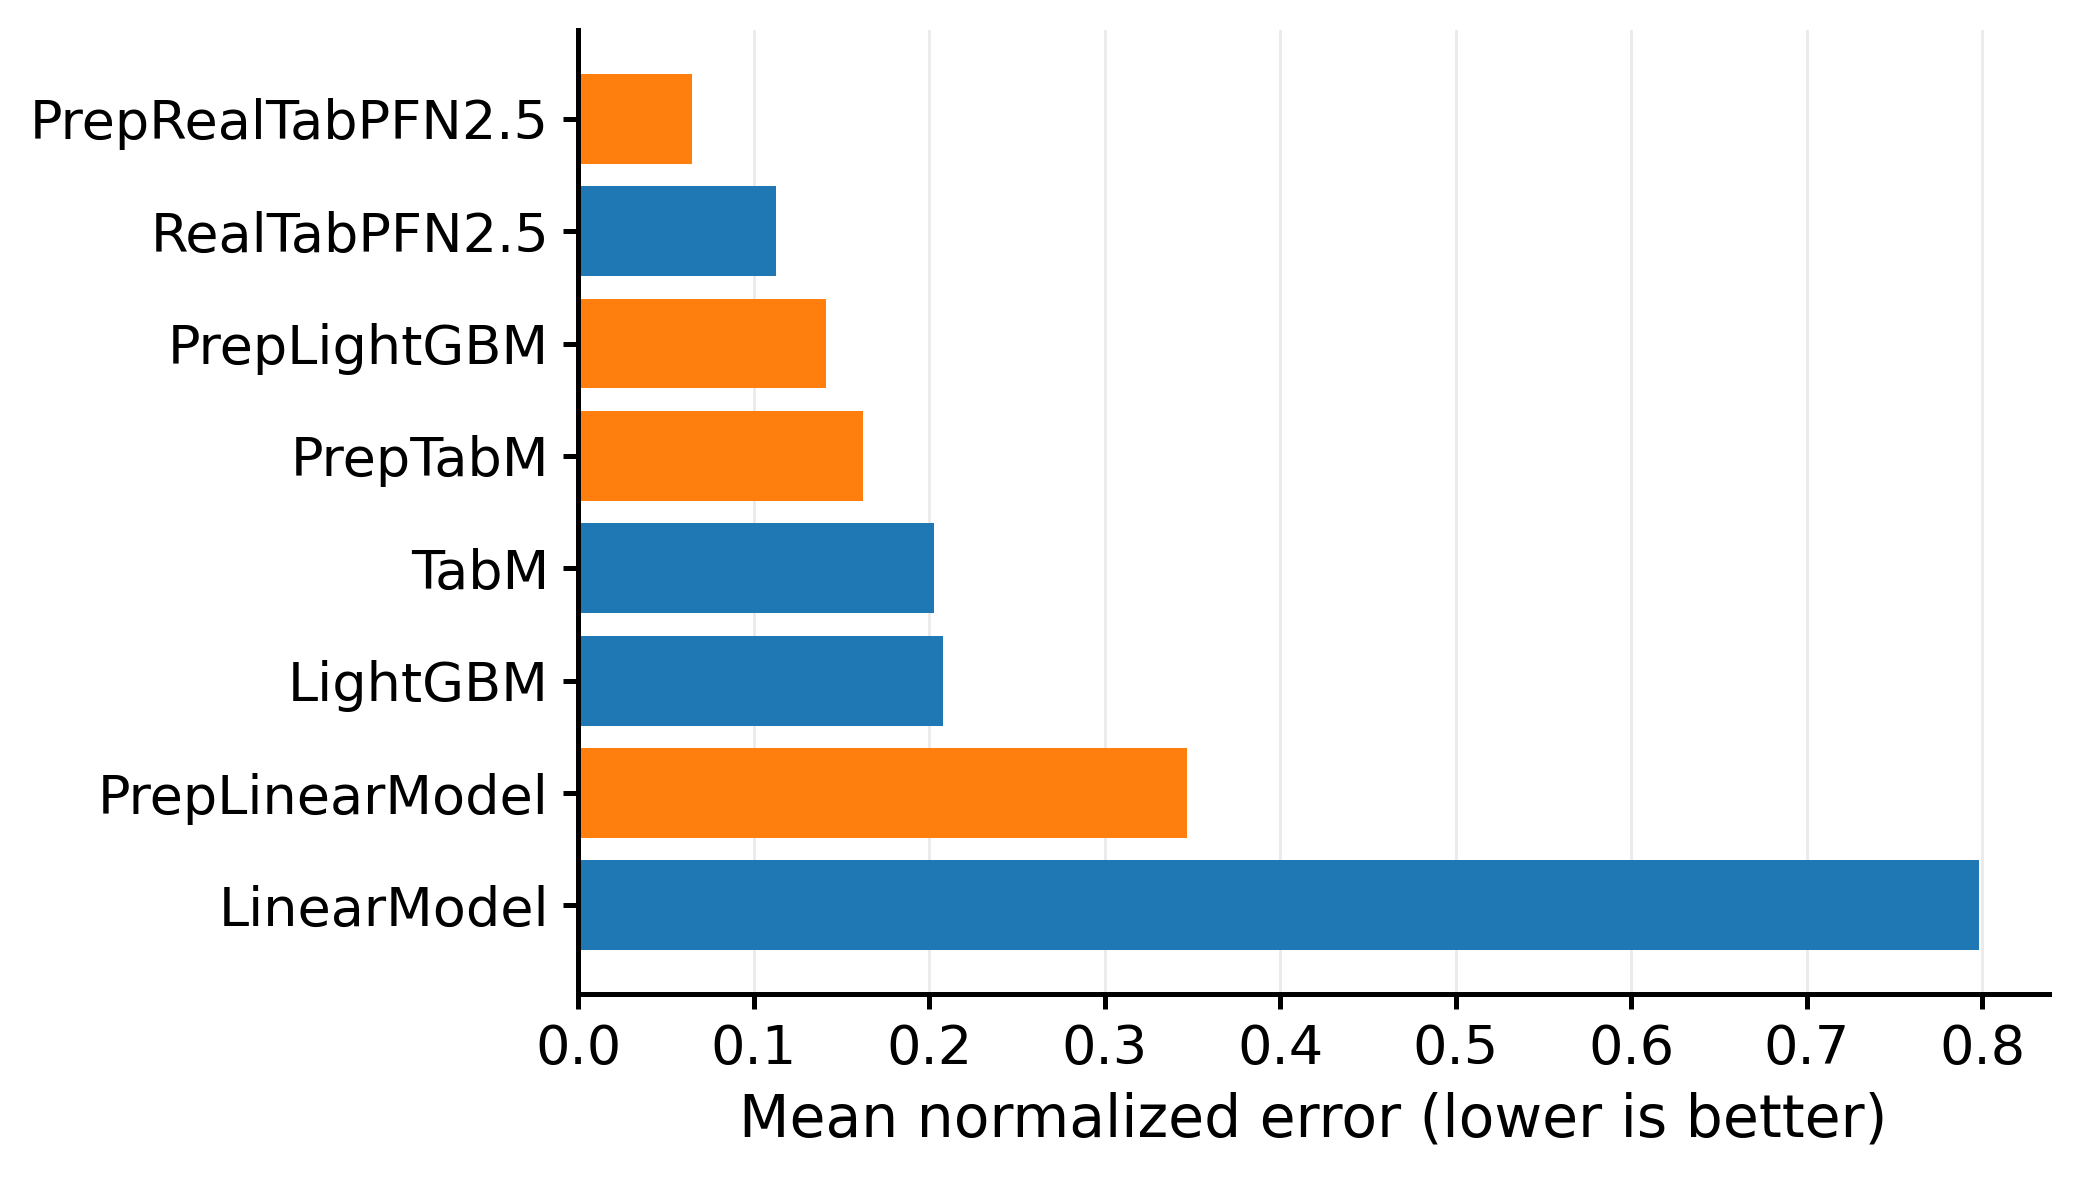

In [236]:
_ = normalized_model_means_barplot(
    comb_results_use_bar,
    plot_models=plot_models,
    model_colors=colors,
    # save_path="/ceph/atschalz/auto_prep/tabarena/tabarena/tabarena/icml2026/figures/normalized_model_means_barplot.pdf",
)

### Who gains the most?

In [484]:
prep_results = comb_results_use[comb_results_use.ta_name.apply(lambda x: "Prep" in x).values].copy()
prep_results.ta_name += prep_results.method_subtype

In [ ]:
base_results = comb_results_use[comb_results_use.ta_name.apply(lambda x: "Prep" not in x).values].copy()
base_results.ta_name += base_results.method_subtype

In [482]:
base_results.shape

(2685, 6)

In [481]:
crown_takes(base_results, prep_results)

,dataset,prep_ta,prep_error,dethroned_base_ta,previous_best_error
0,APSFailure,PrepLightGBM,0.003789,ModernNCA_GPU,0.004109
1,APSFailure,PrepLightGBM,0.003599,PrepLightGBM,0.003789
2,Amazon_employee,PrepTabM,0.123447,CatBoost,0.125285
3,Amazon_employee,PrepTabM,0.121912,PrepTabM,0.123447
4,Amazon_employee,PrepRealTabPFN2.5,0.117521,PrepTabM,0.121912
5,Amazon_employee,PrepRealTabPFN2.5,0.115405,PrepRealTabPFN2.5,0.117521
6,Bioresponse,PrepLightGBM,0.107018,RealTabPFN2.5,0.108117
7,Fiat-500,PrepRealTabPFN2.5,671.234985,TabDPT_GPU,676.981030
8,Fiat-500,PrepRealTabPFN2.5,665.795898,PrepRealTabPFN2.5,671.234985
9,Food_Delivery,PrepTabM,7.253379,CatBoost,7.401572


In [480]:
import pandas as pd
import numpy as np

# Columns assumed:
# base_results:  dataset, ta_name, metric_error
# prep_results:  dataset, ta_name, metric_error
# LOWER metric_error is better.

def crown_takes(base_results: pd.DataFrame,
                prep_results: pd.DataFrame,
                order_cols=None) -> pd.DataFrame:
    """
    Returns rows from prep_results where the method achieves a new best (per dataset),
    along with which *base* method it dethroned (the crown holder at the start).
    
    order_cols: columns to sort prep_results by to define 'whenever it achieves...'
               If None, uses current row order of prep_results.
    """

    base = base_results.copy()
    prep = prep_results.copy()

    # Ensure numeric
    base["metric_error"] = pd.to_numeric(base["metric_error"])
    prep["metric_error"] = pd.to_numeric(prep["metric_error"])

    # 1) Initial crown holders from base (best per dataset)
    base_best = (
        base.sort_values(["dataset", "metric_error", "ta_name"])
            .groupby("dataset", as_index=False)
            .first()
            .rename(columns={
                "ta_name": "base_crown_ta",
                "metric_error": "base_crown_error",
            })
    )

    # 2) Define order in which prep models "arrive"
    if order_cols is not None:
        prep = prep.sort_values(order_cols).reset_index(drop=False).rename(columns={"index": "_orig_idx"})
    else:
        prep = prep.reset_index(drop=False).rename(columns={"index": "_orig_idx"})

    # 3) Walk per dataset; maintain current best error + current crown holder
    crown_map = {
        row["dataset"]: (row["base_crown_error"], row["base_crown_ta"])
        for _, row in base_best.iterrows()
    }

    events = []
    for _, r in prep.iterrows():
        ds = r["dataset"]
        ta = r["ta_name"]
        err = r["metric_error"]

        # If base has no entry for this dataset, treat as "no crown yet"
        if ds not in crown_map:
            crown_map[ds] = (np.inf, None)

        best_err, best_ta = crown_map[ds]

        # New best?
        if err < best_err:
            events.append({
                "dataset": ds,
                "prep_ta": ta,
                "prep_error": err,
                "dethroned_base_ta": best_ta,
                "previous_best_error": best_err,
                "_orig_idx": r["_orig_idx"],
            })
            # Update crown holder to this prep method (so later prep methods dethrone it)
            crown_map[ds] = (err, ta)

    out = pd.DataFrame(events)

    # Helpful: keep original prep order if you want
    return out.sort_values(["dataset", "_orig_idx"]).drop(columns=["_orig_idx"]).reset_index(drop=True)


# ---- usage ----
# If you have a timestamp/iteration column (recommended), pass it via order_cols.
# ex: order_cols=["dataset", "run_id"] or ["timestamp"] etc.
crown_events = crown_takes(base_results, prep_results, order_cols=None)

# crown_events now tells you: each time a prep model sets a new best,
# which base crown-holder it took the crown from (or None if base had no crown).
crown_events

,dataset,prep_ta,prep_error,dethroned_base_ta,previous_best_error
0,APSFailure,PrepLightGBM,0.003789,ModernNCA_GPU,0.004109
1,APSFailure,PrepLightGBM,0.003599,PrepLightGBM,0.003789
2,Amazon_employee,PrepTabM,0.123447,CatBoost,0.125285
3,Amazon_employee,PrepTabM,0.121912,PrepTabM,0.123447
4,Amazon_employee,PrepRealTabPFN2.5,0.117521,PrepTabM,0.121912
5,Amazon_employee,PrepRealTabPFN2.5,0.115405,PrepRealTabPFN2.5,0.117521
6,Bioresponse,PrepLightGBM,0.107018,RealTabPFN2.5,0.108117
7,Fiat-500,PrepRealTabPFN2.5,671.234985,TabDPT_GPU,676.981030
8,Fiat-500,PrepRealTabPFN2.5,665.795898,PrepRealTabPFN2.5,671.234985
9,Food_Delivery,PrepTabM,7.253379,CatBoost,7.401572
